# Customer Retention - EDA Analysis

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Problem Statement: 

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store;
it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. 
A comprehensive review of the literature, theories and models have been carried out to propose the models 
for customer activation and customer retention. Five major factors that contributed to the success of an 
e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. 
The research furthermore investigated the factors that influence the online customers repeat purchase intention. 
The combination of both utilitarian value and hedonistic values are needed to affect the repeat 
purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. 
Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


Prediction:

We need to analyze the data to predict the E-retail factors for customer activation and retention

In [446]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [448]:
# loading Customer Retention dataset and Creating DataFrame

cr = pd.read_csv('Customer_retention_dataset.csv')

customer = pd.DataFrame(data = cr)
customer

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [449]:
customer.shape

(269, 71)

We have total of 269 rows and 71 columns in customer retention dataset

In [450]:
customer.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [447]:
# Importing re library to remove numerical data from columns

import re

In [451]:
# Removing unwanted data from columns

customer.columns = customer.columns.str.replace('\t','').str.strip()

customer1 =[]
for i in range(len(customer.columns)):
    if i ==len(customer.columns)-72:
        break
    else:
        cust = re.sub(r'[0-9]','',customer.columns[i]).strip()
    customer1.append(cust)
customer1
customer.columns = customer1
customer.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [453]:
customer

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
..                   ...                 ...   
264               Female         21-30 years   
265               Female         31-40 years   
266               Female         41-50 yaers   
267               Female  Less than 20 years   
268               Female         41-50 yaers   

    Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
..                                  ...   
264                               Solan   
265                           Ghaziabad   
266                          Bangalore    
267                               Solan   
268                           Ghaziabad   

     What is the Pin Code of where you shop online from?  \
0                                               110009     
1                                               110030     
2                                               201308     
3                                               132001     
4                                               530068     
..                                                 ...     
264                                             173212     
265                                             201008     
266                                             560010     
267                                             173229     
268                                             201009     

    Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   
..                                       ...   
264                                1-2 years   
265                                1-2 years   
266                                2-3 years   
267                                2-3 years   
268                                2-3 years   

    How many times you have made an online purchase in the past  year?  \
0                                          31-40 times                   
1                                   41 times and above                   
2                                   41 times and above                   
3                                   Less than 10 times                   
4                                          11-20 times                   
..                                                 ...                   
264                                 Less than 10 times                   
265                                        31-40 times                   
266                                 Less than 10 times                   
267                                 Less than 10 times                   
268                                        31-40 times                   

    How do you access the internet while shopping on-line?  \
0                                              Dial-up       
1                                                Wi-Fi       
2                                      Mobile Internet       
3                                      Mobile Internet       
4                                                Wi-Fi       
..                                                 ...       
264                                    Mobile Internet       
265                                    Mobile Internet       
266                                    Mobile internet       
267                                              Wi-Fi       
268                                    Mo

In [454]:
customer.info

<bound method DataFrame.info of     Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
..                   ...                 ...   
264               Female         21-30 years   
265               Female         31-40 years   
266               Female         41-50 yaers   
267               Female  Less than 20 years   
268               Female         41-50 yaers   

    Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
..                                  ...   
264                               Solan   
265                           Ghaziabad   
266 

In [222]:
# Analyzing datatypes

customer.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

Analyzing Datatypes:

Except pin code(int64) all the other columns datatype are objects  
Target Column 'Which of the Indian online retailer would you recommend to a friend?' is also object with categorical data.
We can consider the dataset as supervised classification data.

In [455]:
# Analyzing dataset to find null values

customer.isnull().sum()

Gender of respondent                                                                                         0
How old are you?                                                                                             0
Which city do you shop online from?                                                                          0
What is the Pin Code of where you shop online from?                                                          0
Since How Long You are Shopping Online ?                                                                     0
How many times you have made an online purchase in the past  year?                                           0
How do you access the internet while shopping on-line?                                                       0
Which device do you use to access the online shopping?                                                       0
What is the screen size of your mobile device?                                                               0
W

We dont have any null values found in the dataset

<AxesSubplot:>

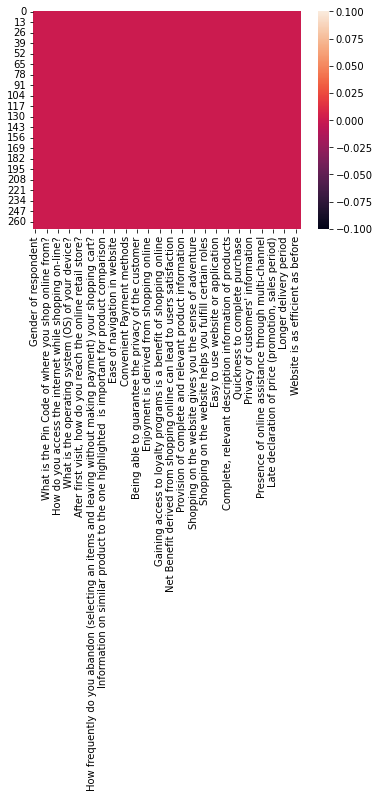

In [456]:
sns.heatmap(customer.isnull())

Visualizing data in heatmap to identify if there are any null values

We didnt find any null values in our dataset

In [457]:
# Checking values in our Target column

customer['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

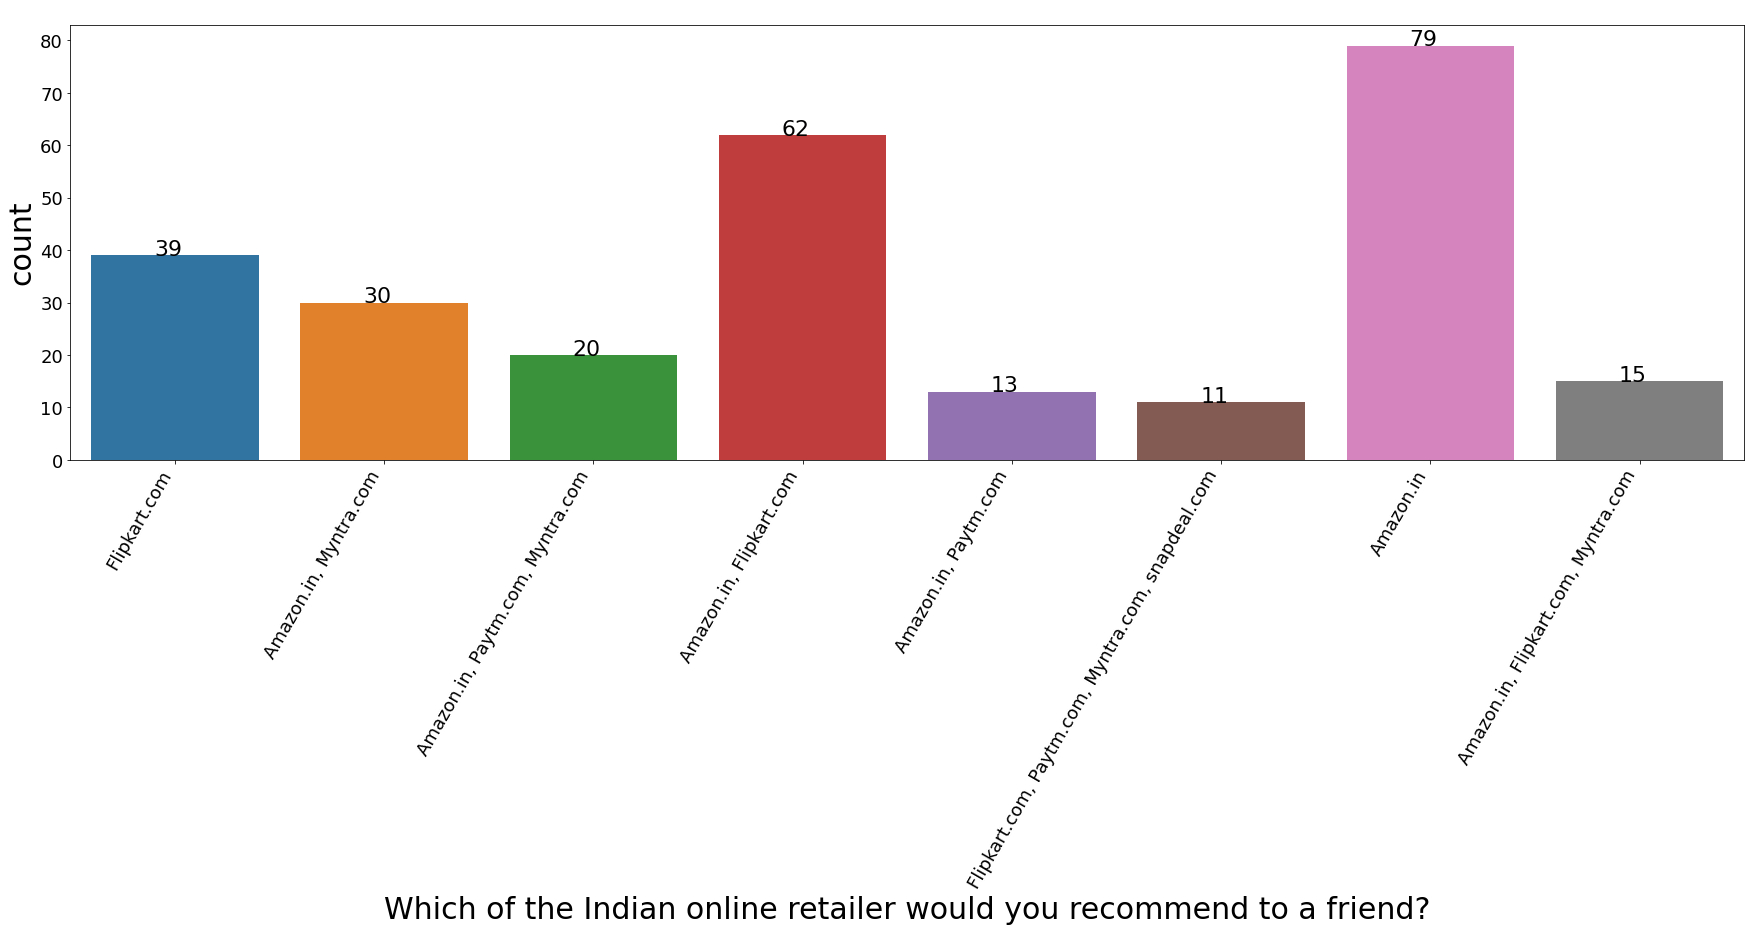

In [458]:
# Visualizing our Target column

countp = sns.countplot(data = customer,x='Which of the Indian online retailer would you recommend to a friend?')
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xlabel('Which of the Indian online retailer would you recommend to a friend?',fontsize=30)
plt.xticks(size=18,rotation=60, ha='right')
plt.ylabel('count',fontsize=30)
plt.yticks(size=18)


for p in countp.patches:
    countp.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), color='black', size=22,)



Observation:
    
Based on the countplot we can identify Amazon was the highly recommended E- Retailer among customers

Followed by flipkart

In [ ]:
pd.set_option('display.max_rows',72)

[]

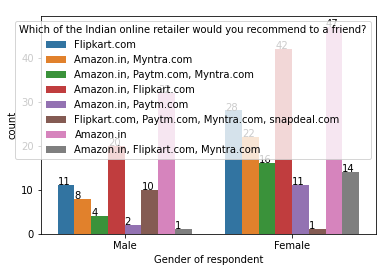

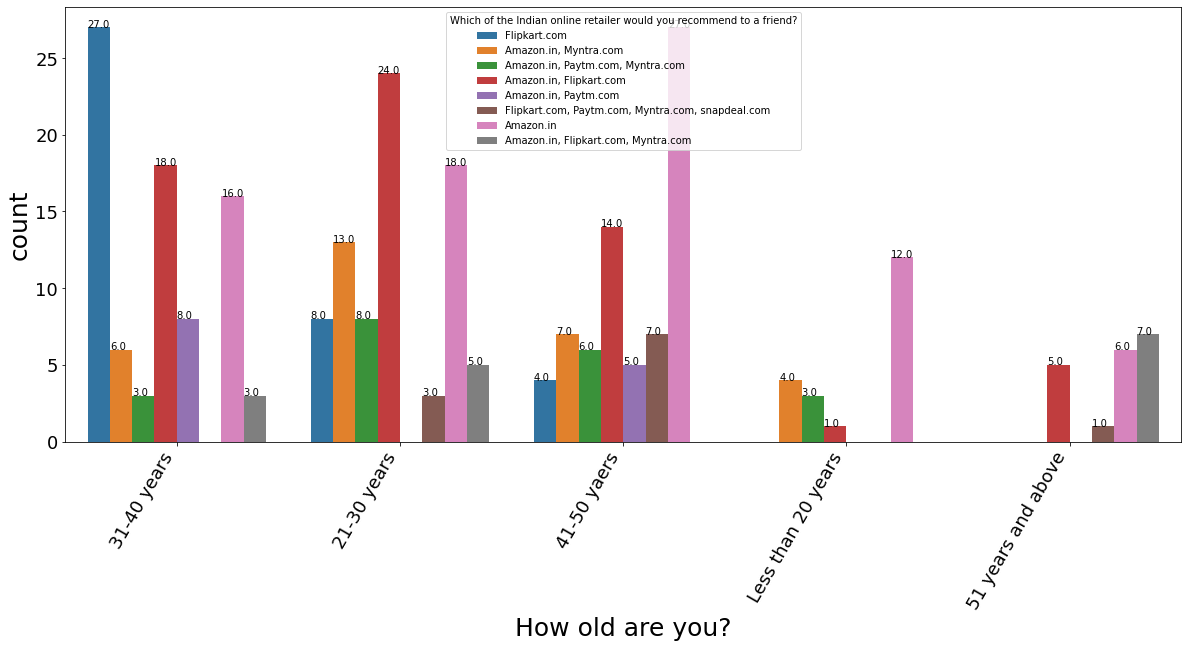

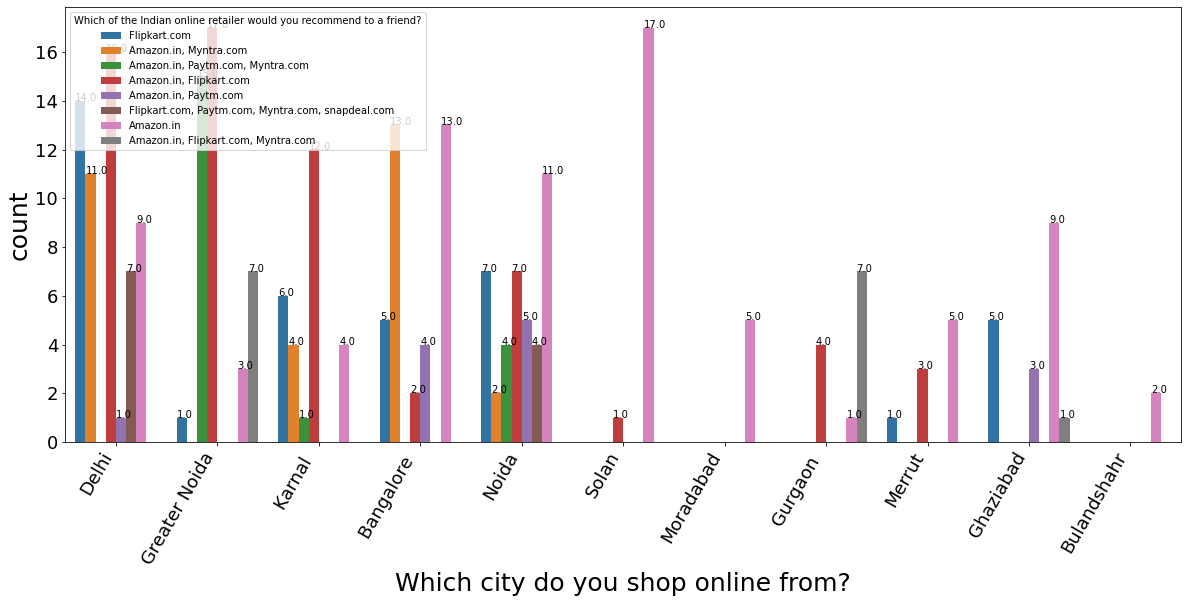

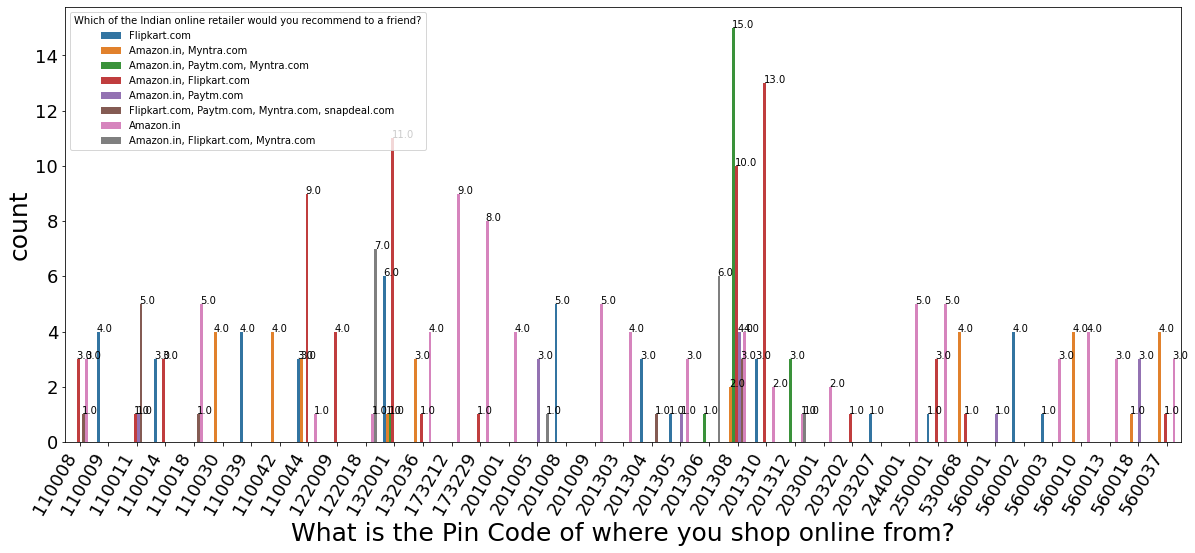

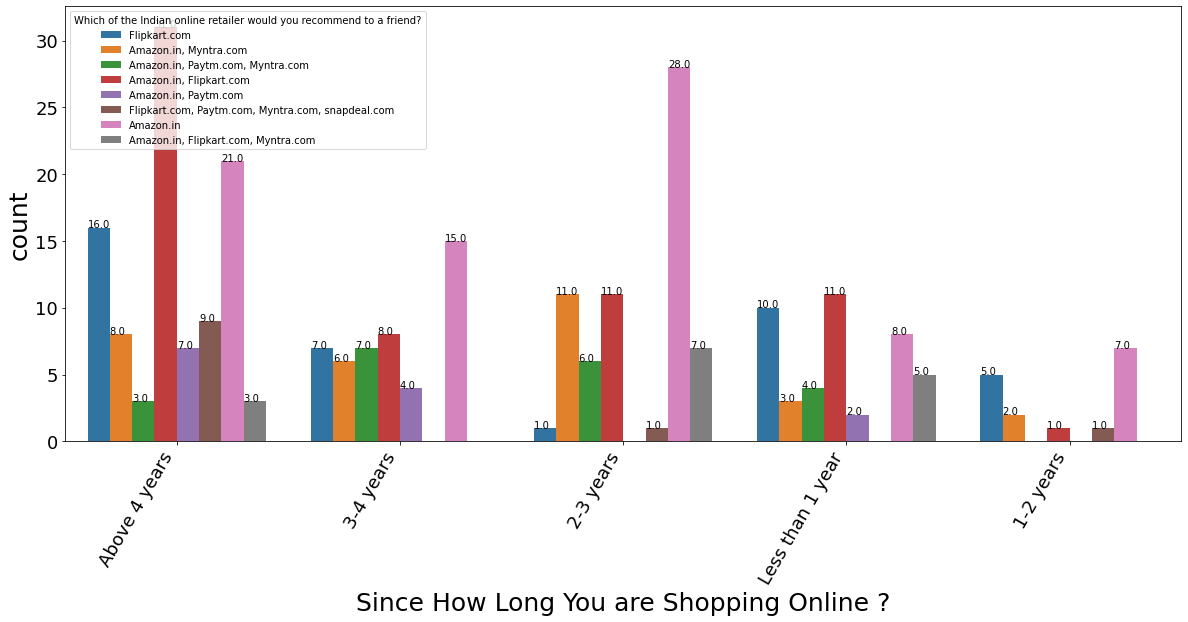

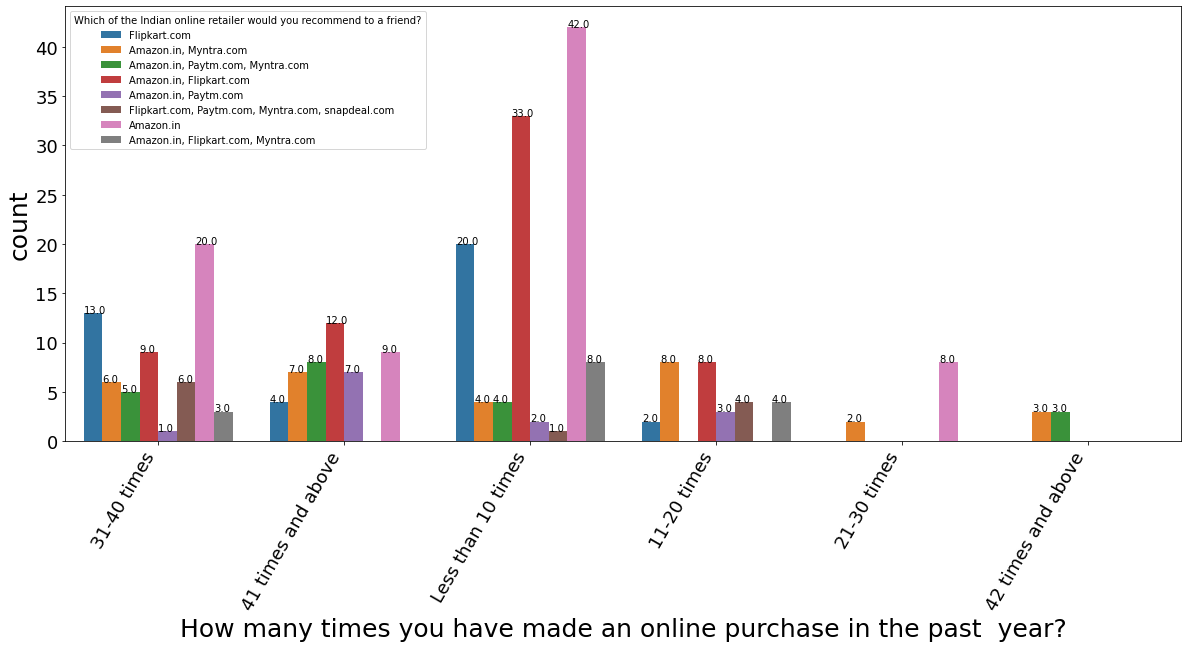

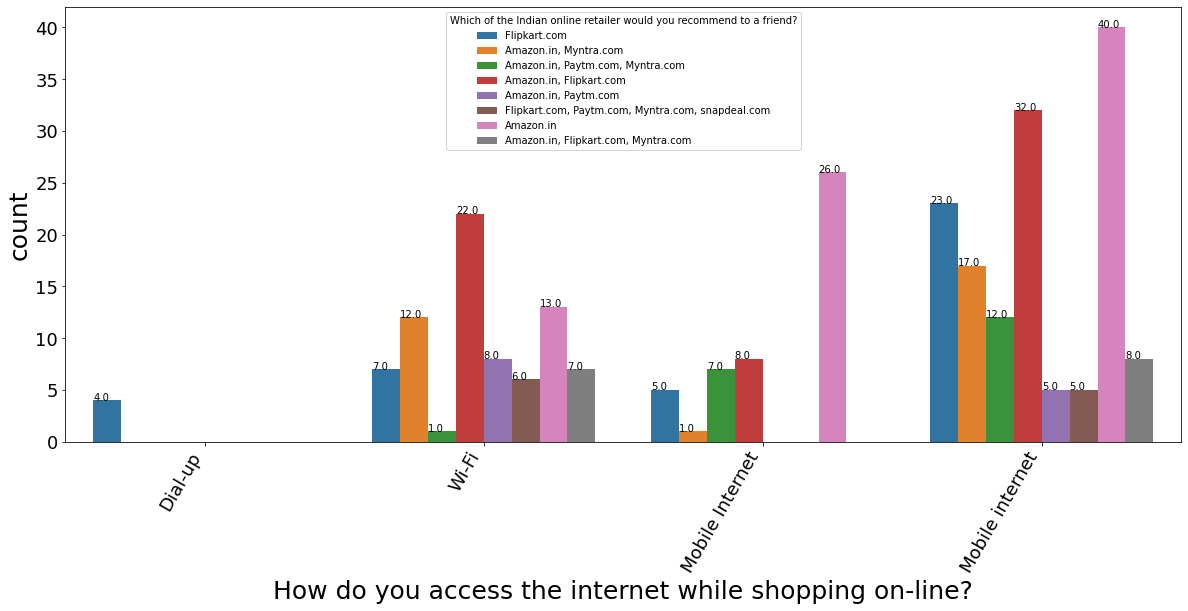

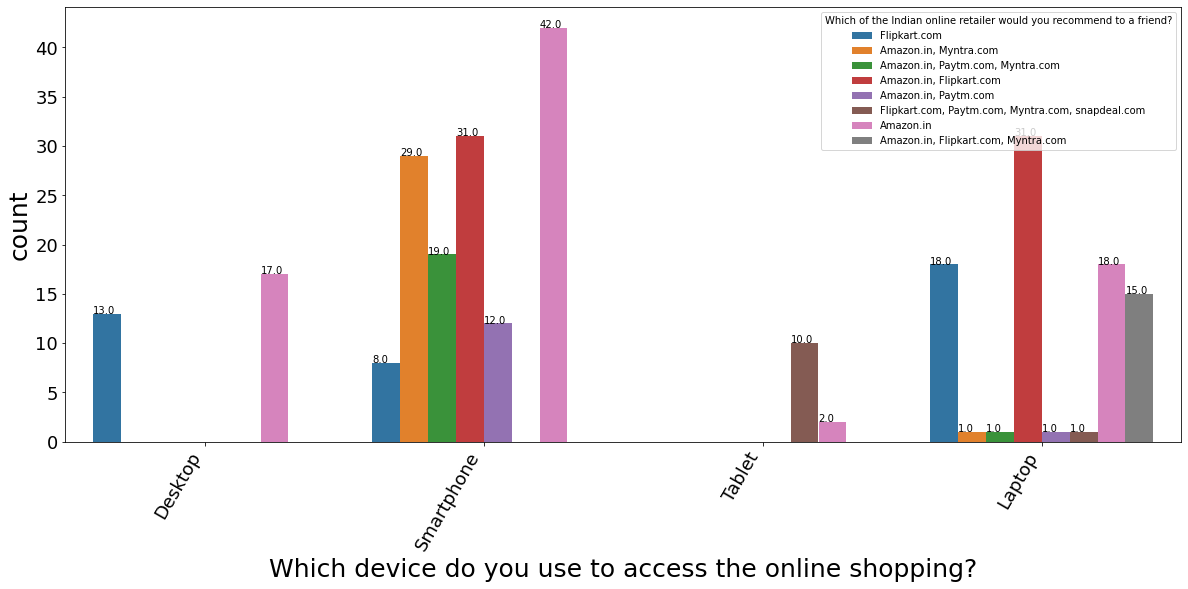

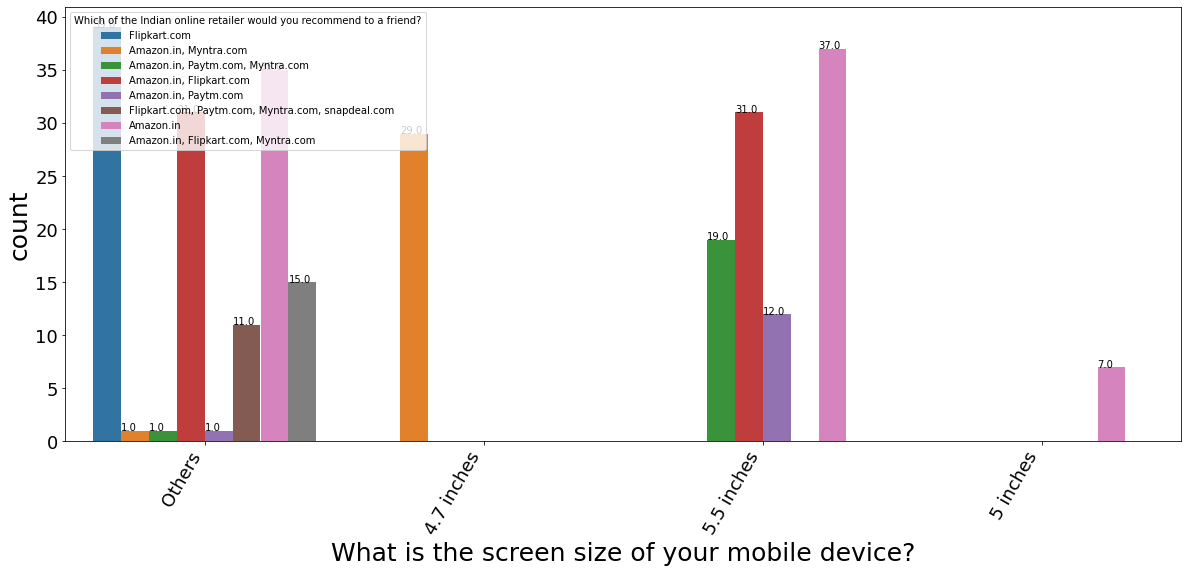

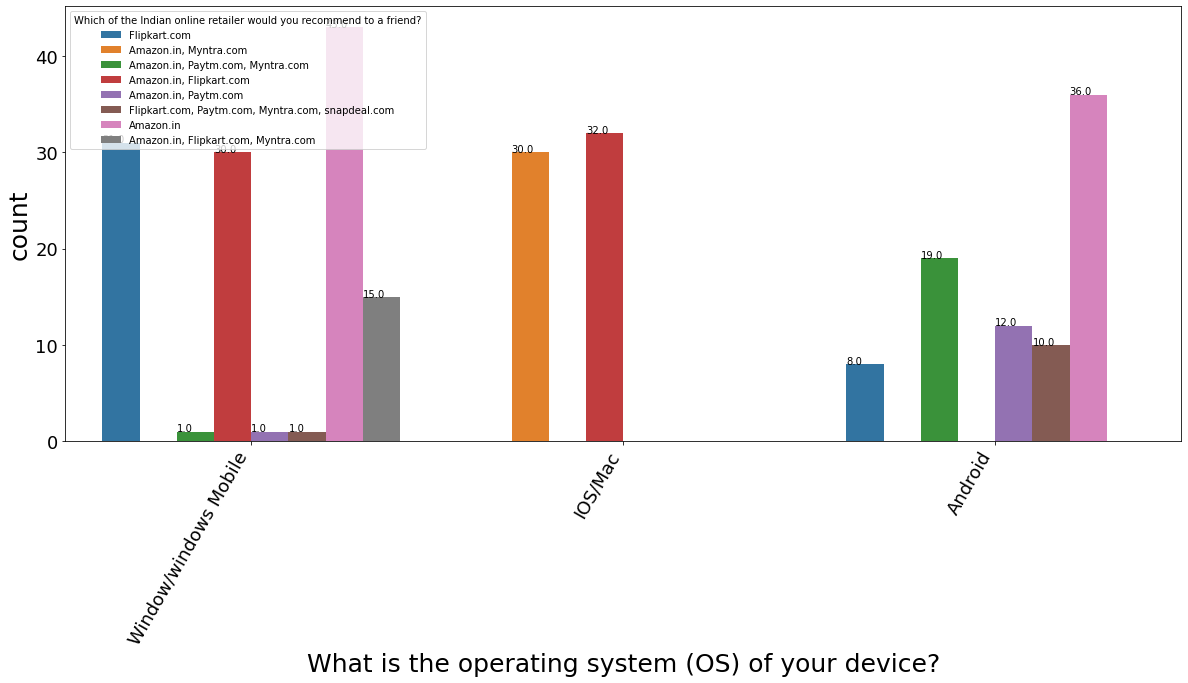

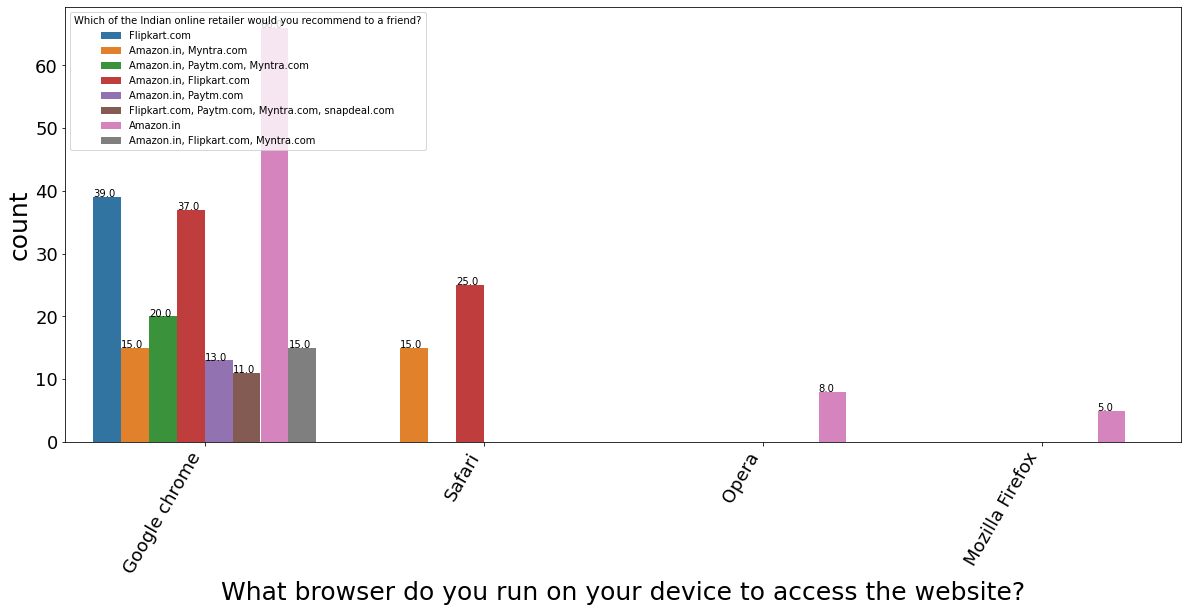

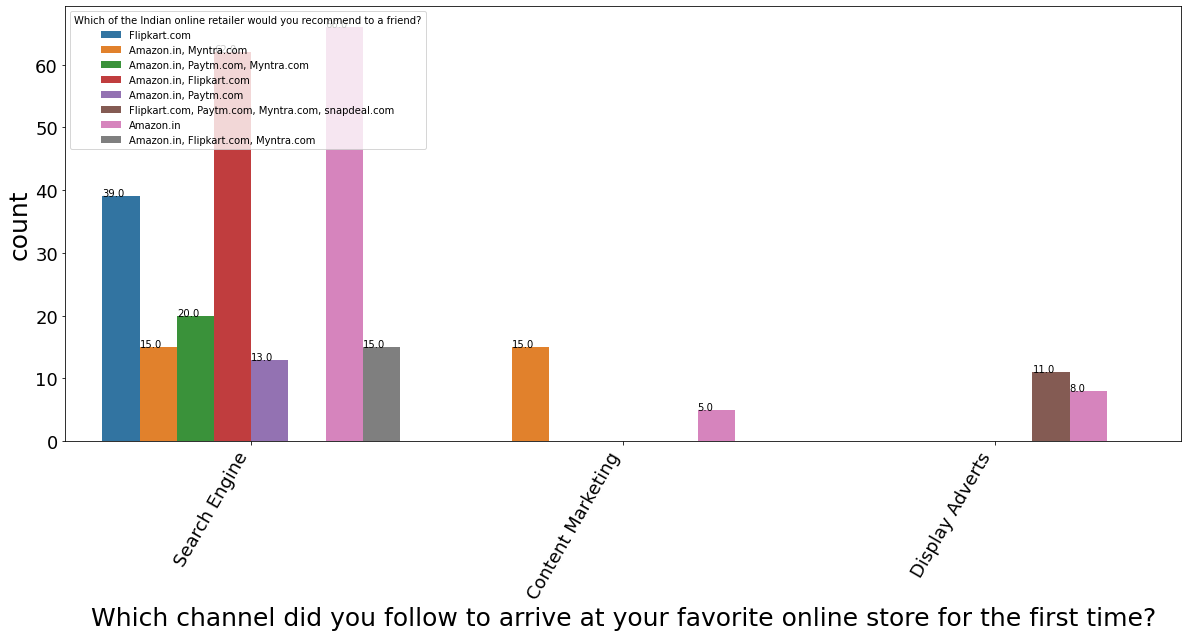

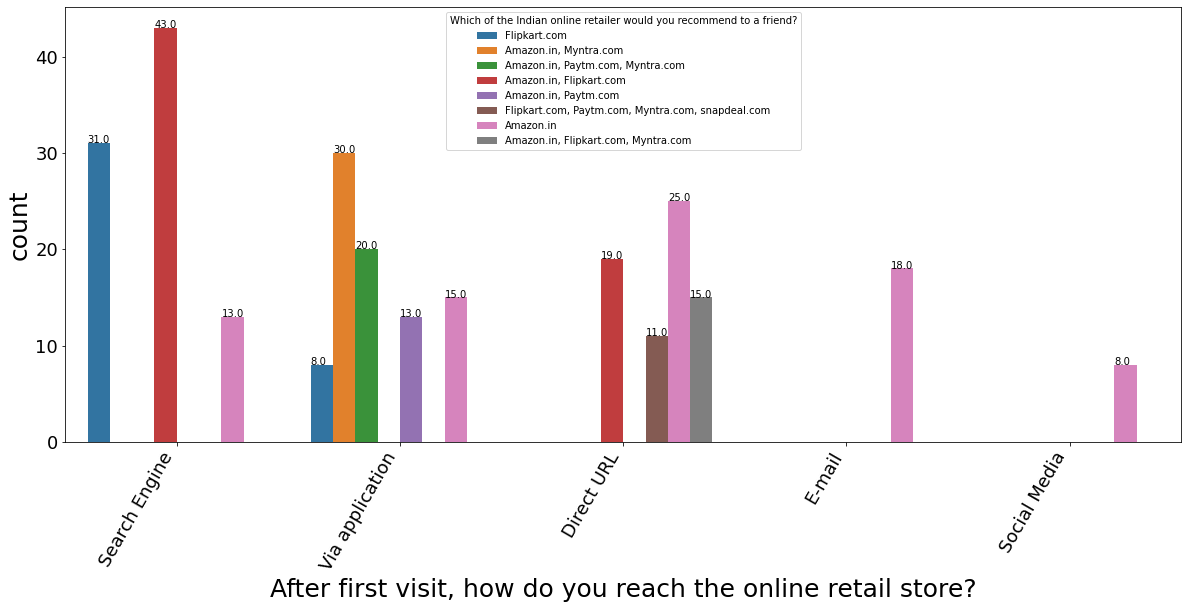

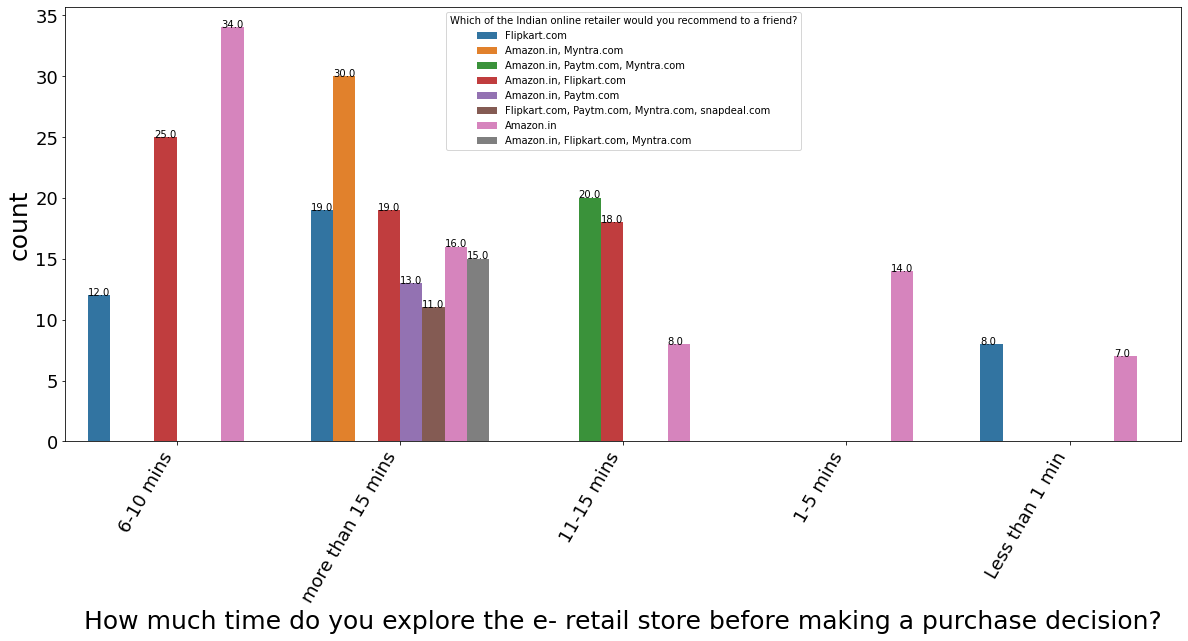

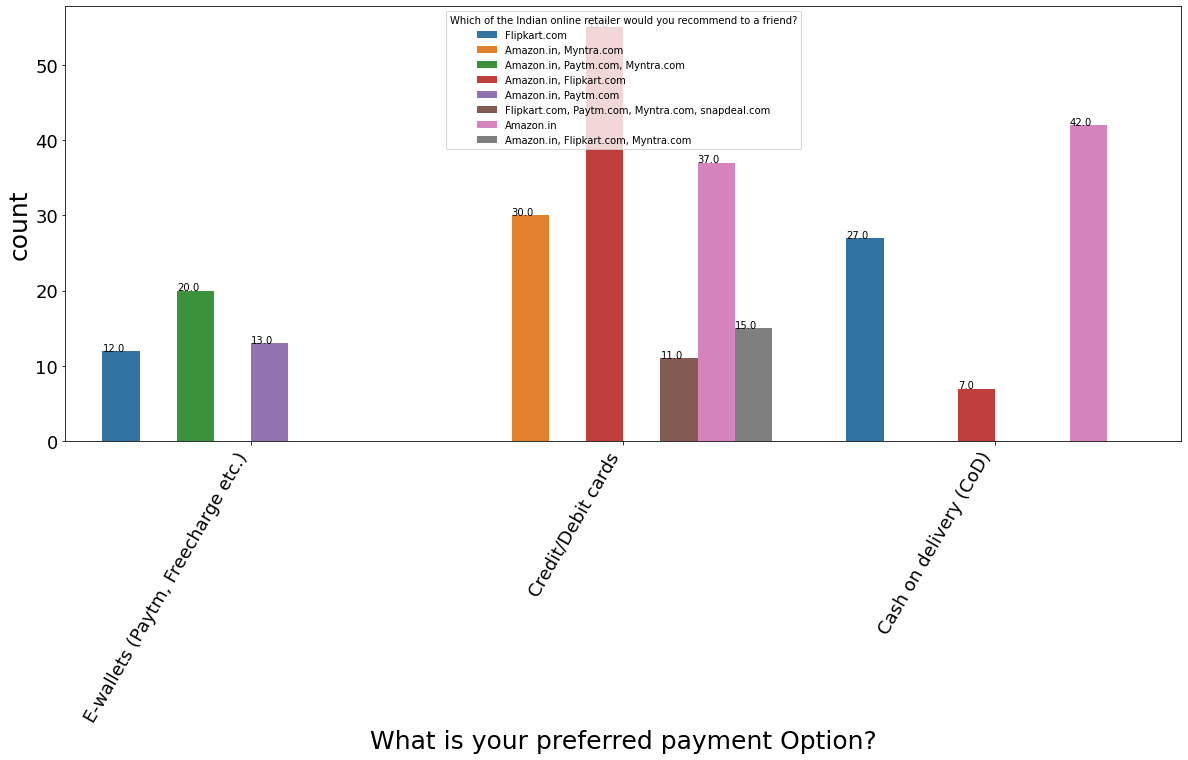

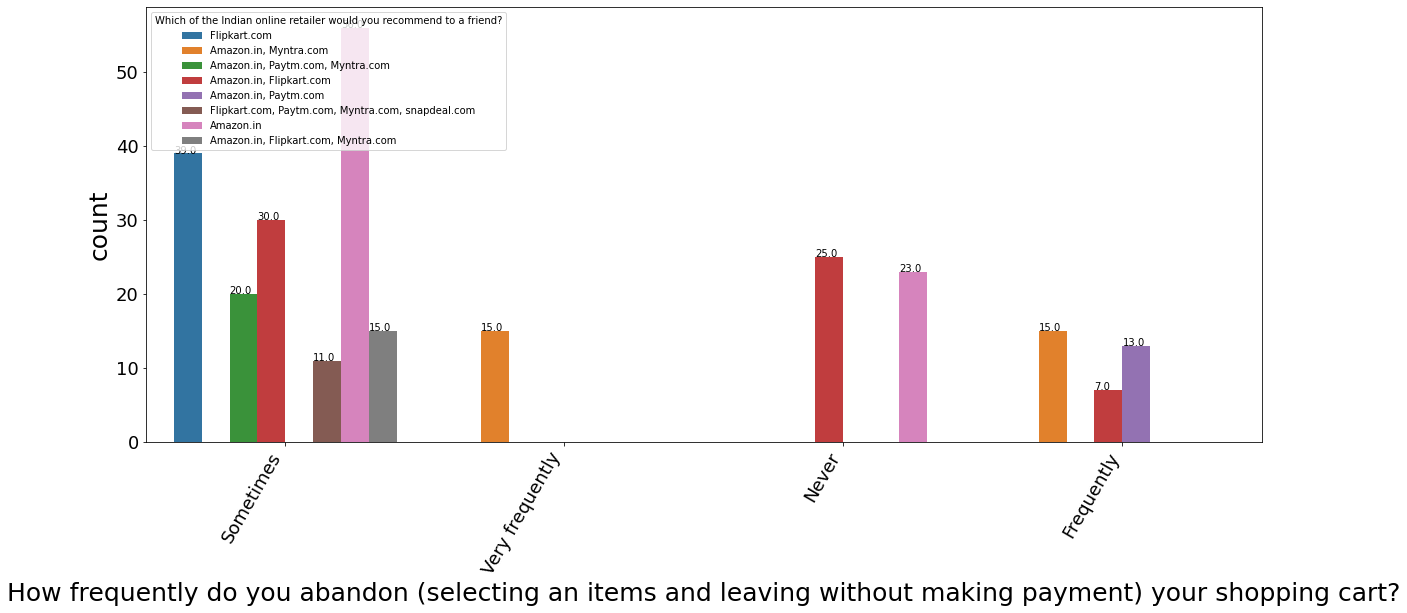

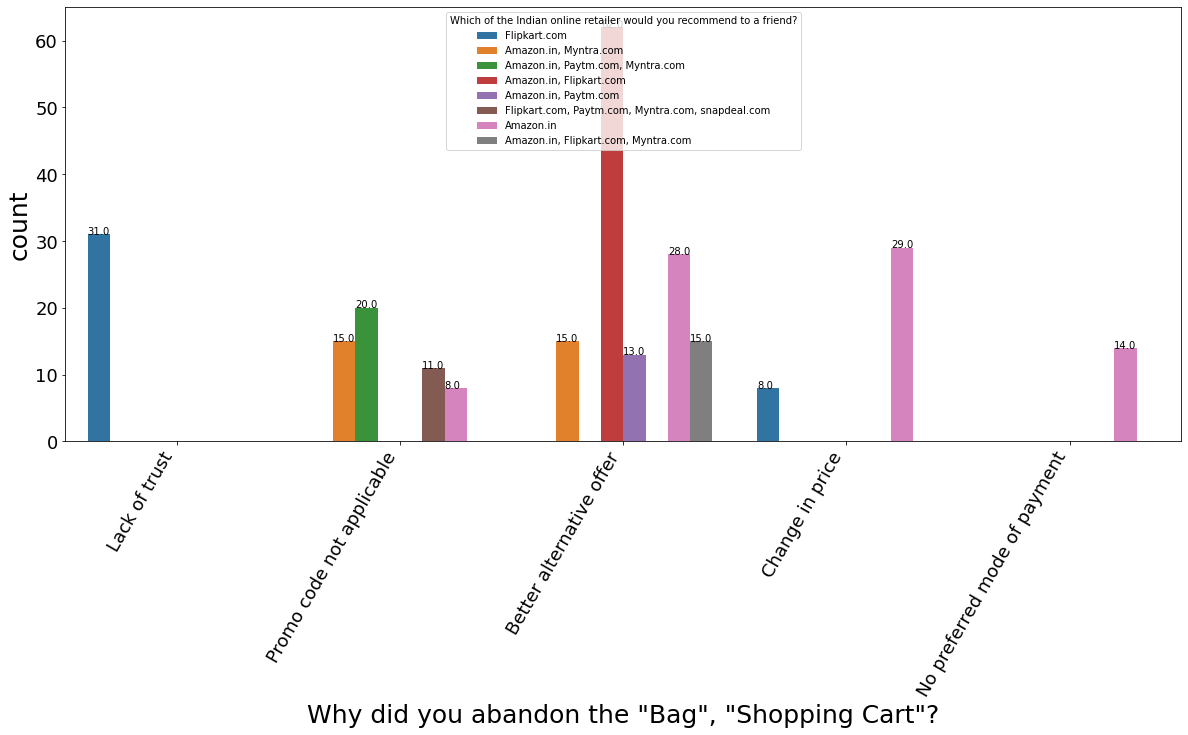

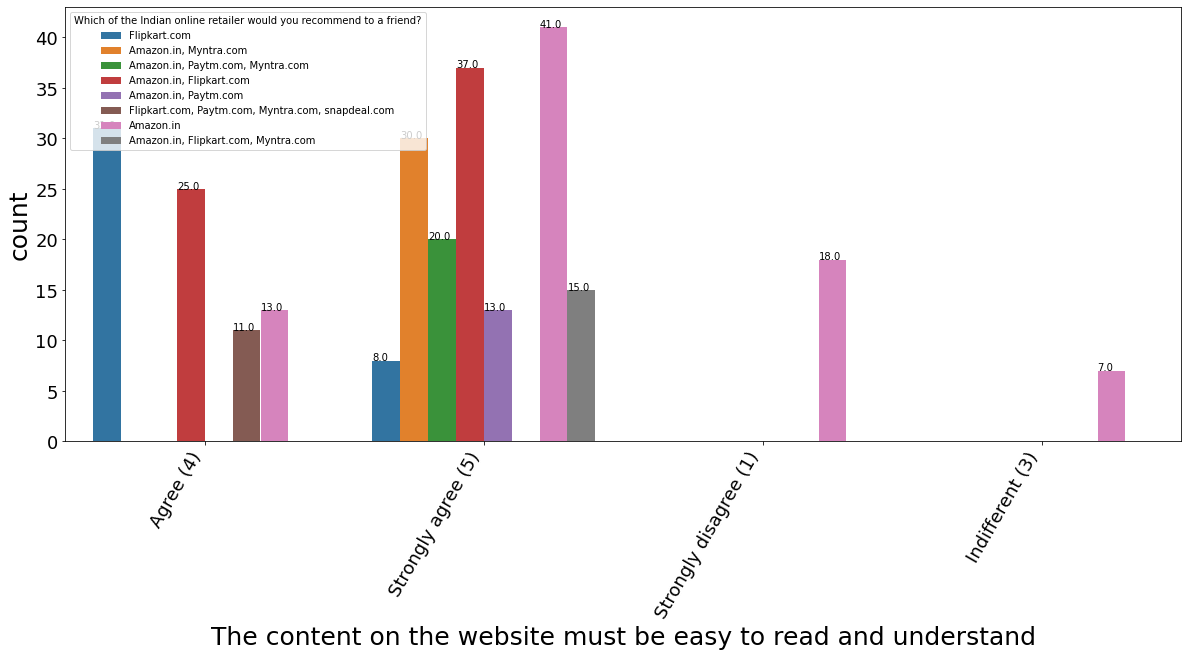

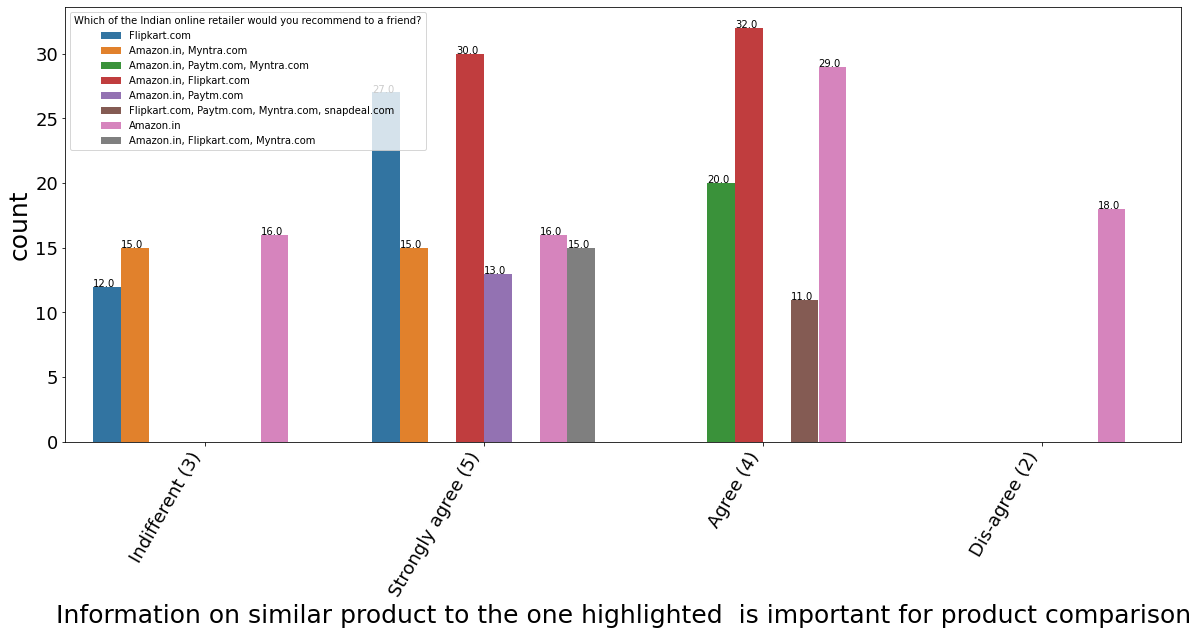

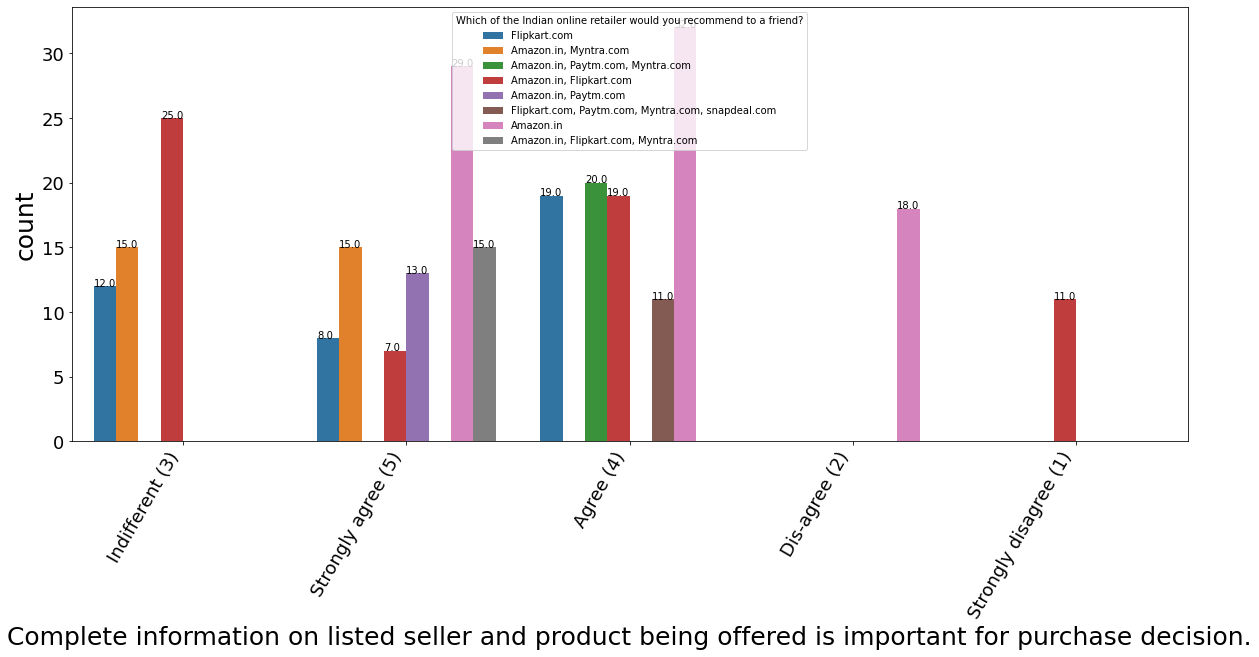

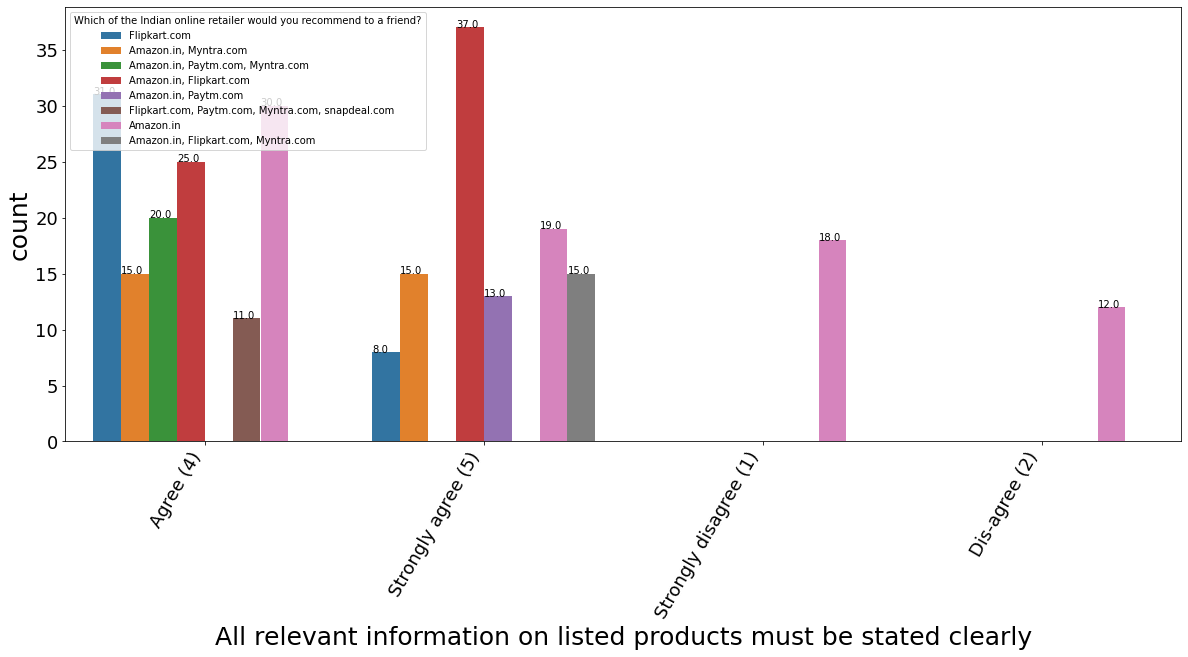

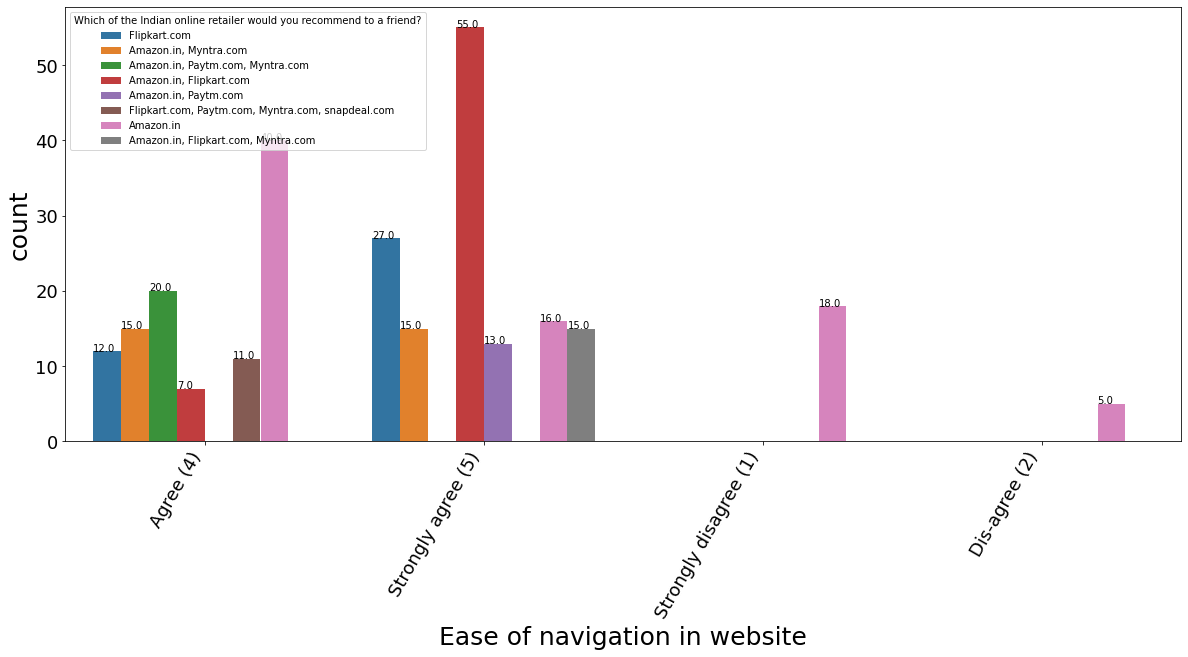

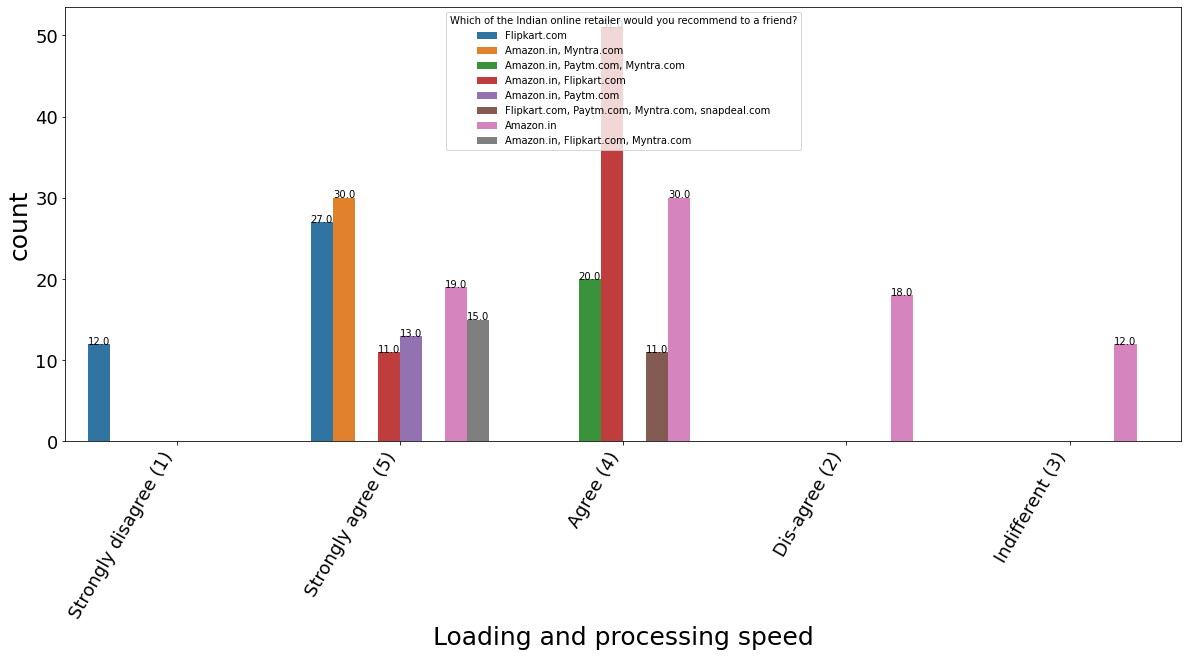

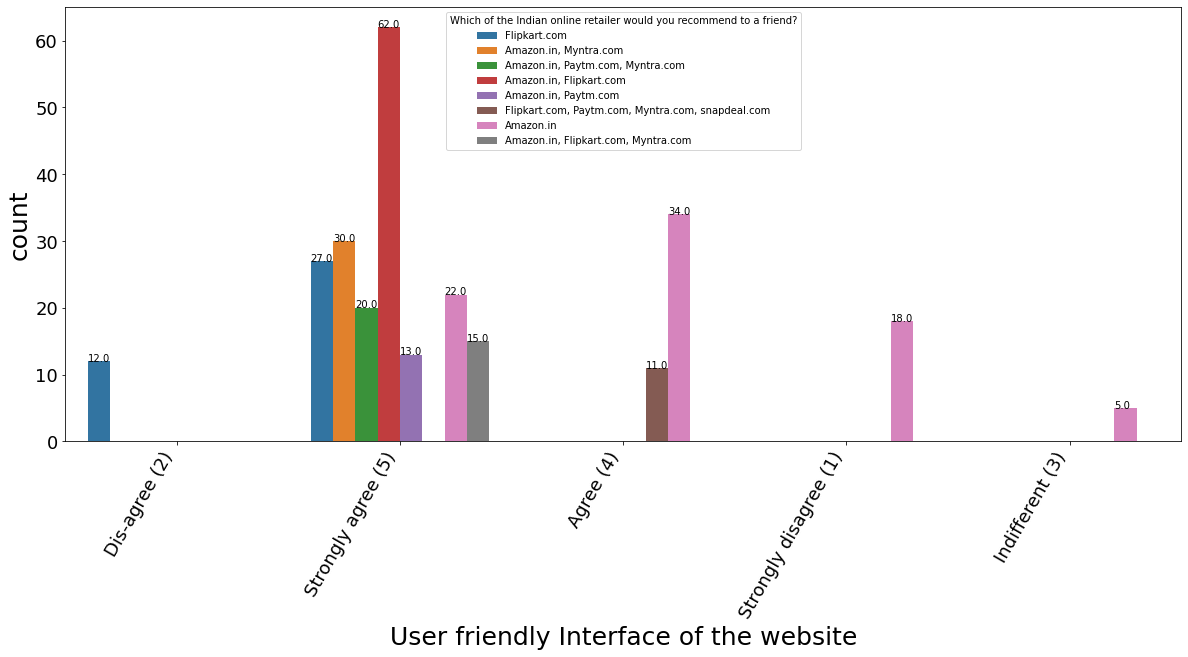

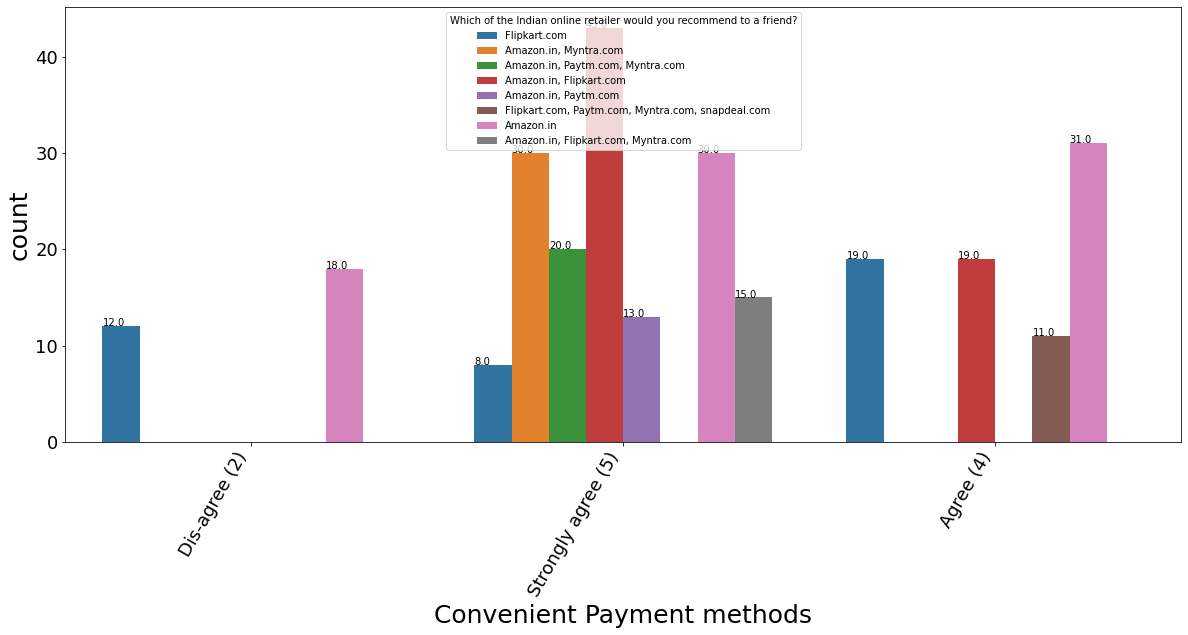

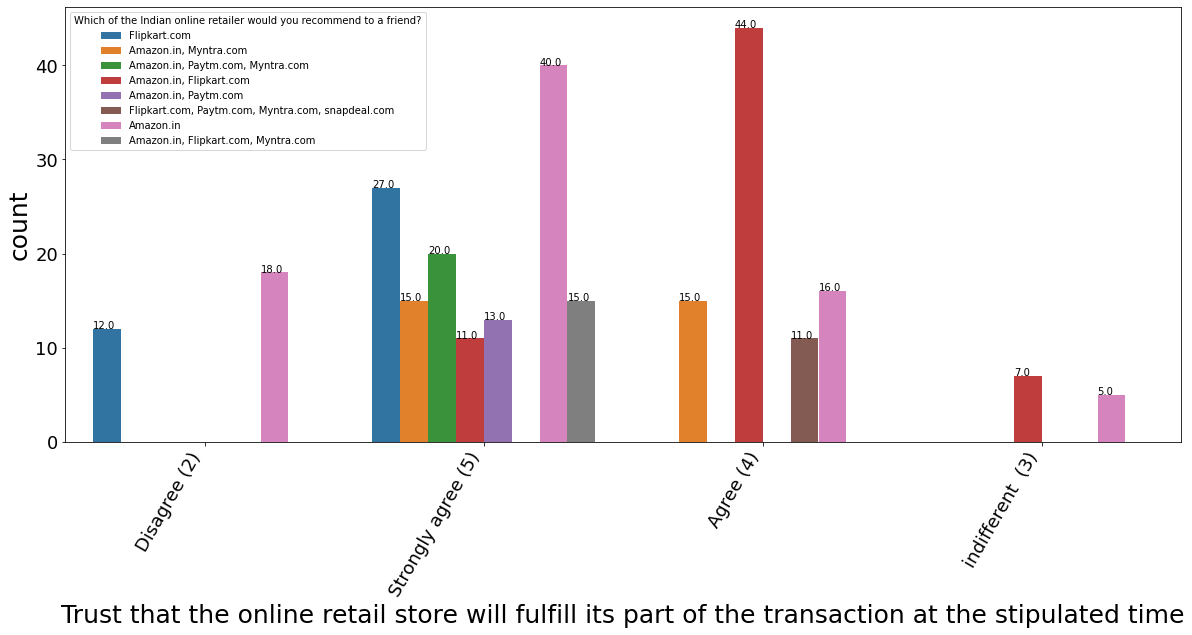

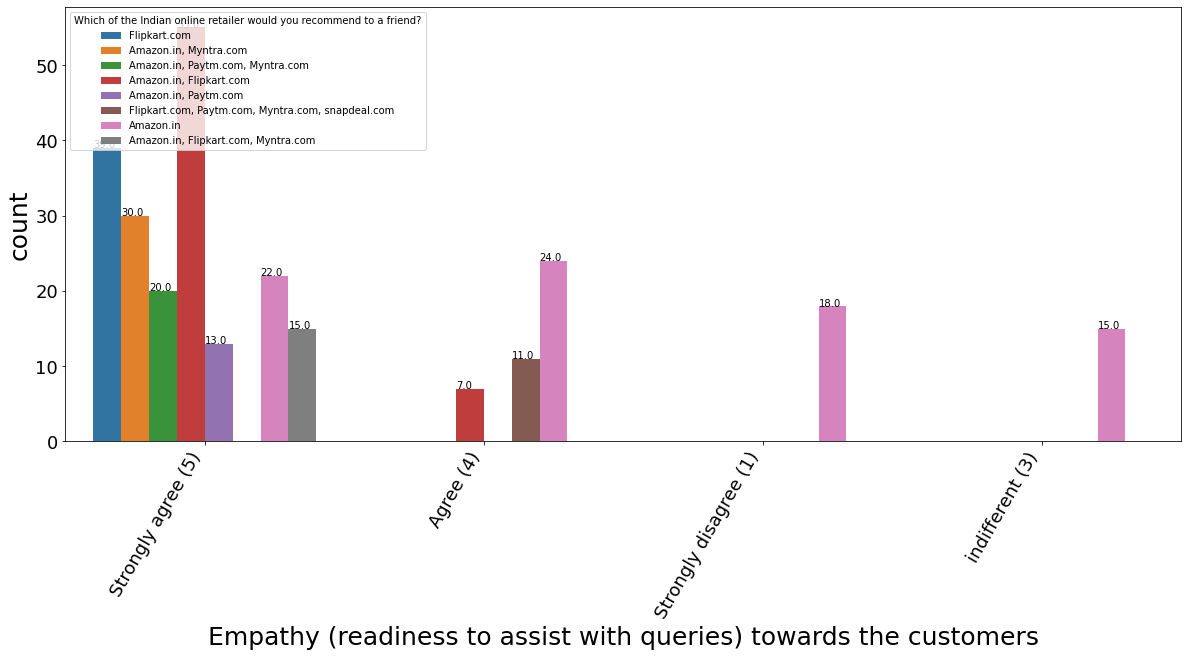

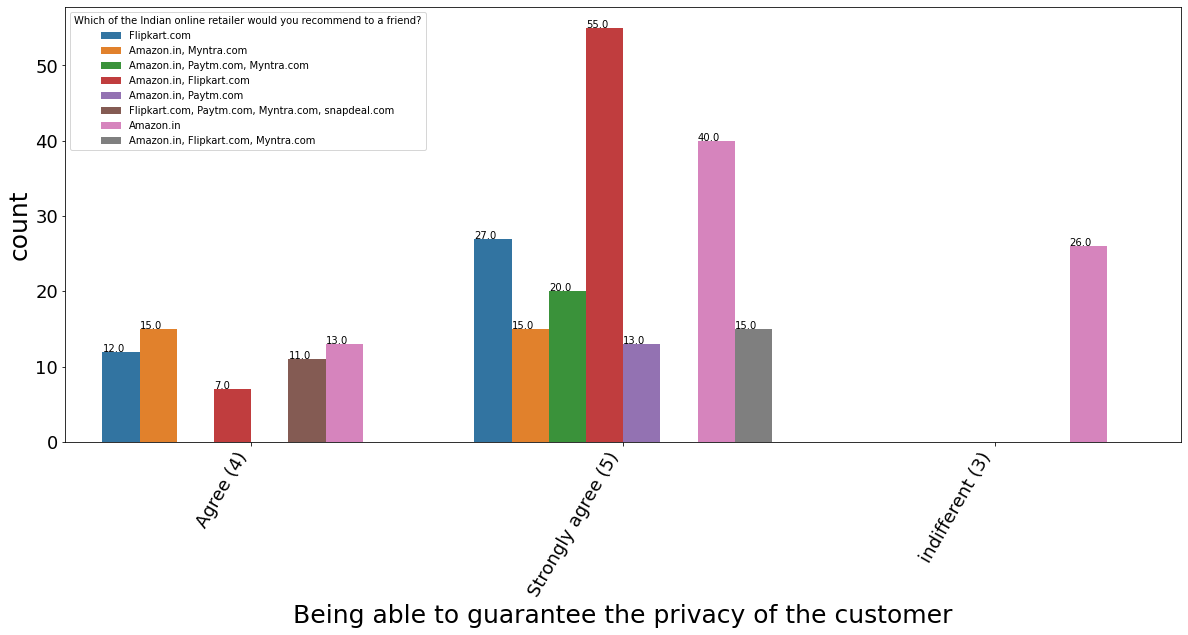

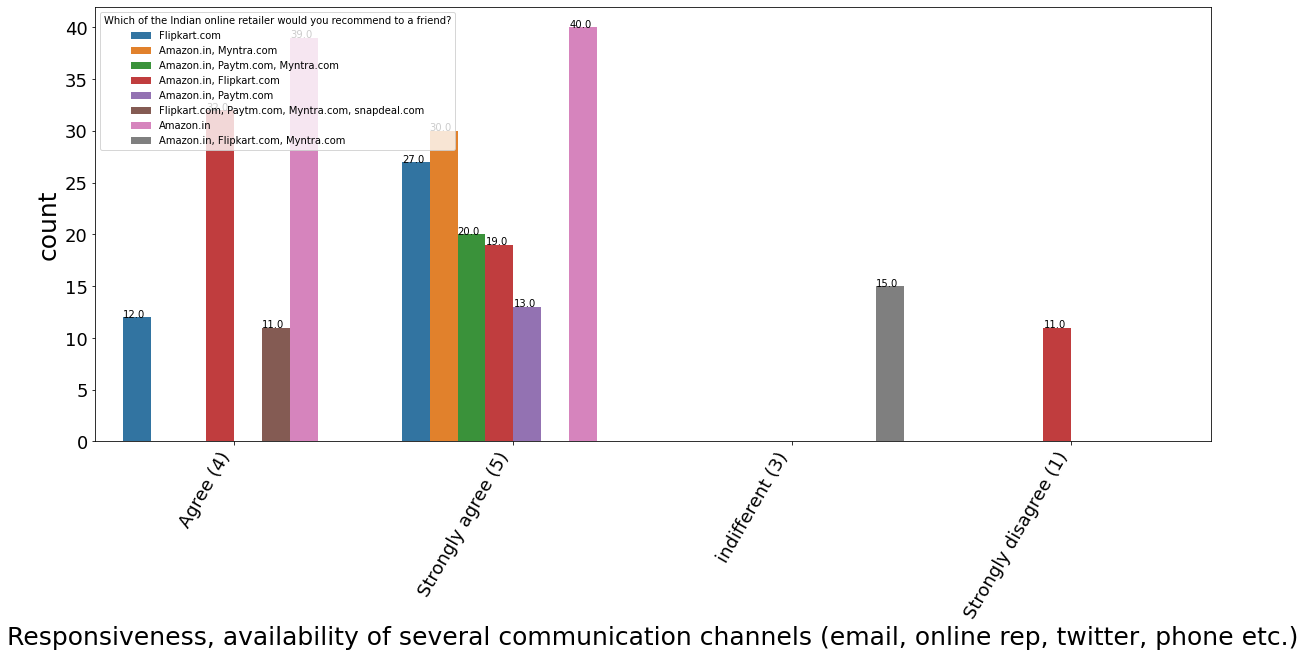

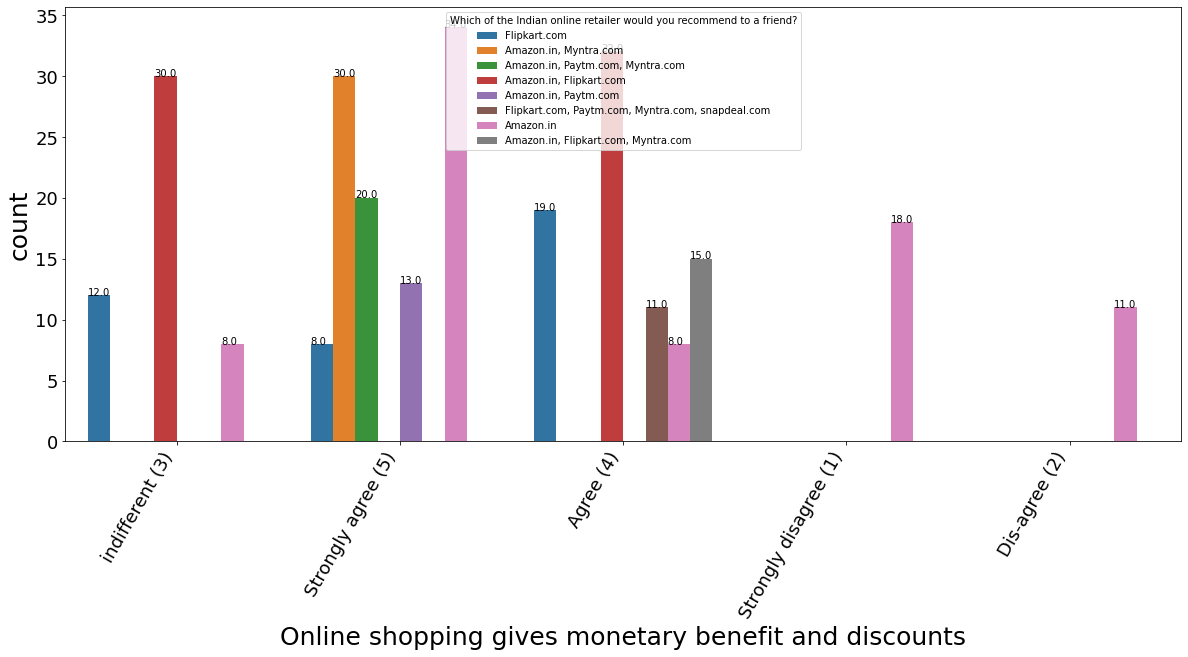

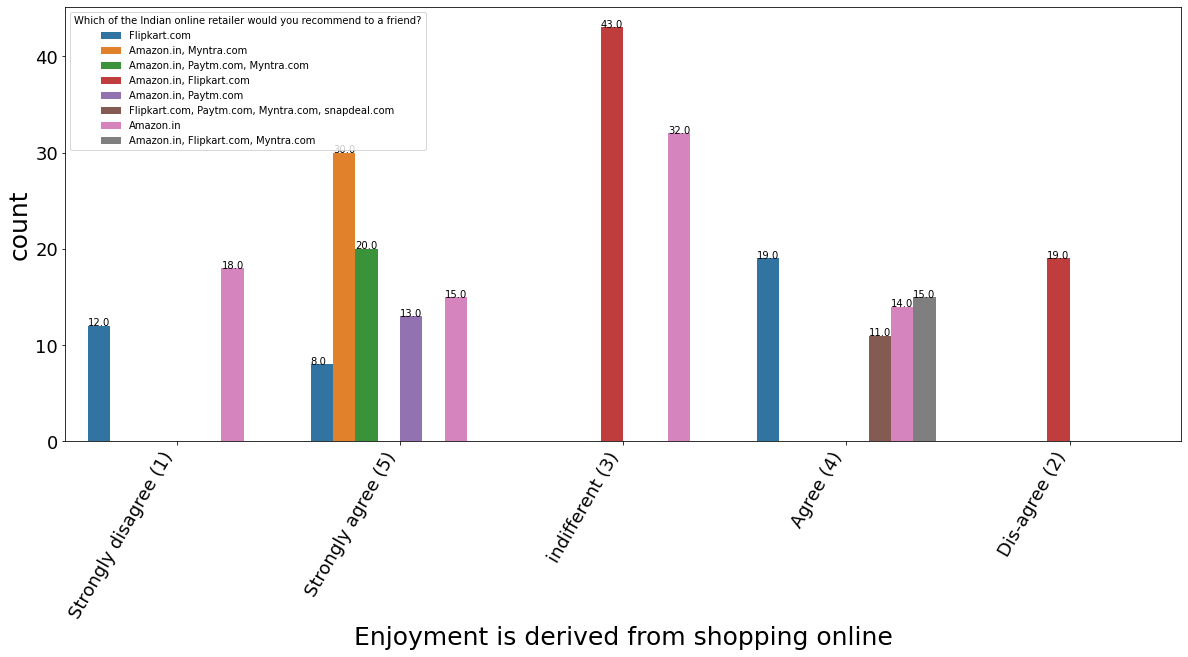

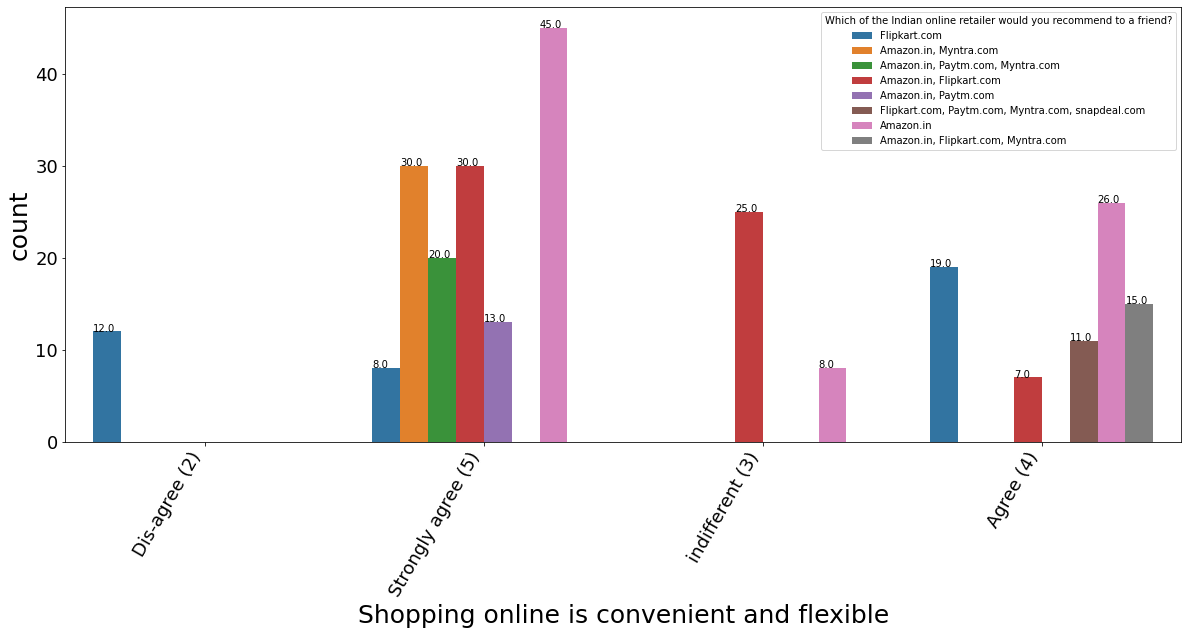

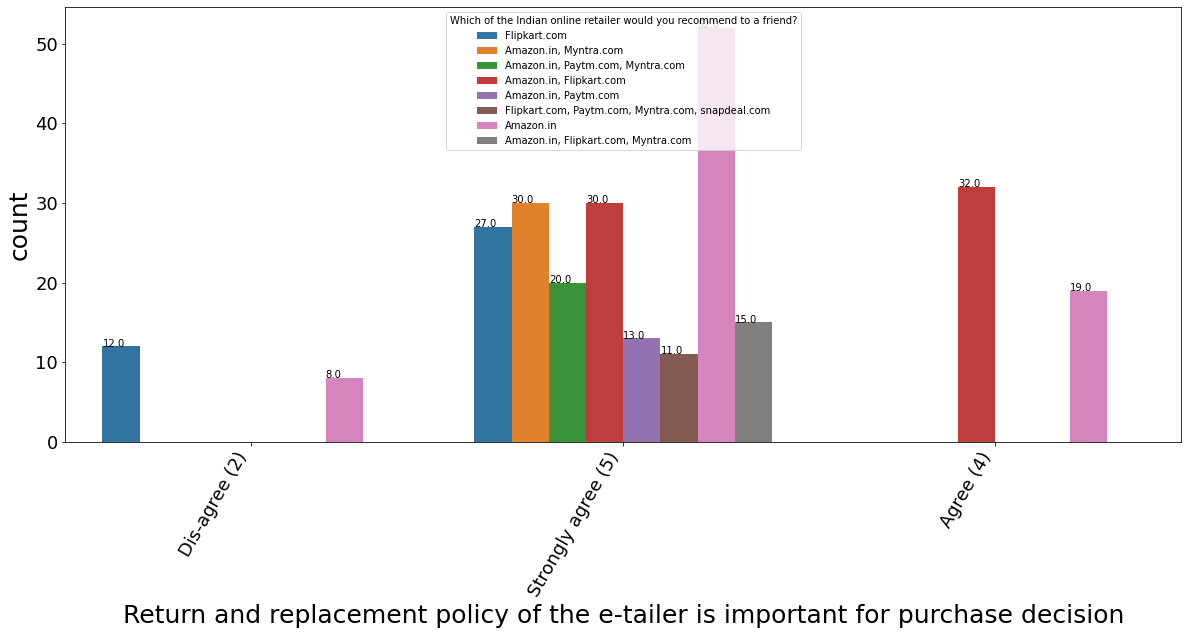

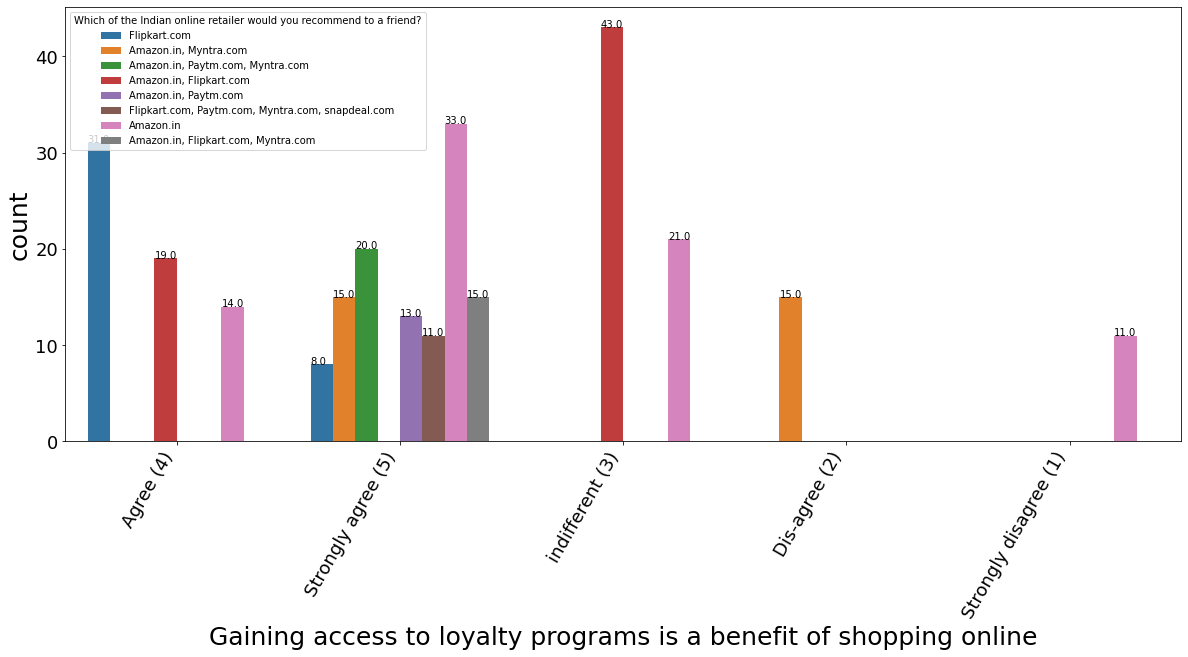

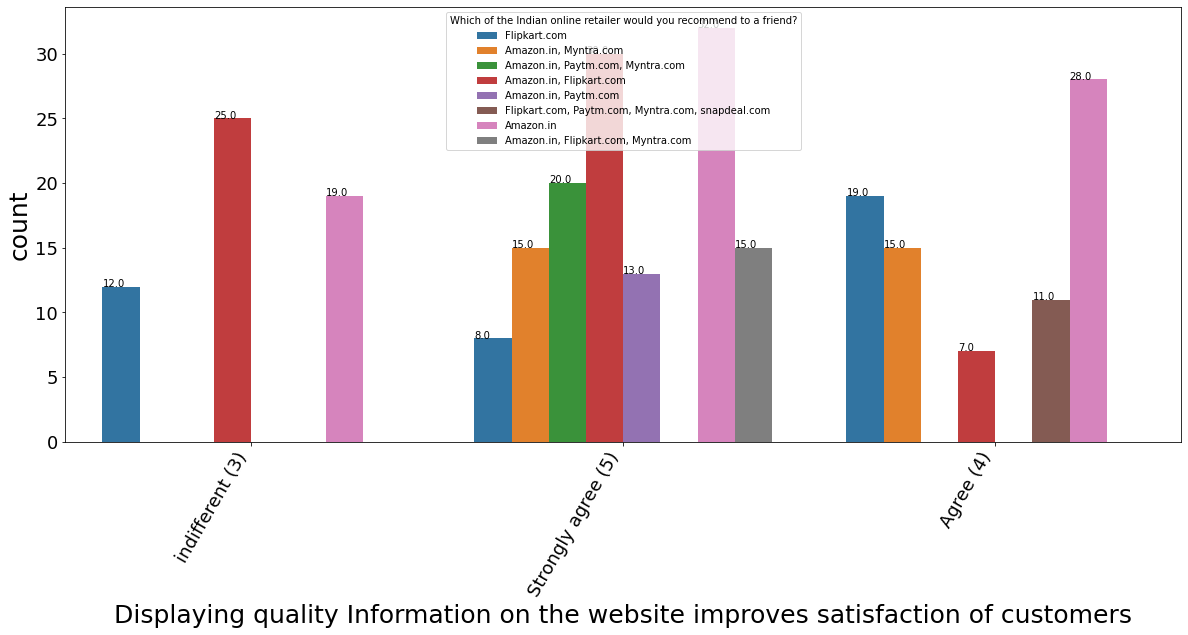

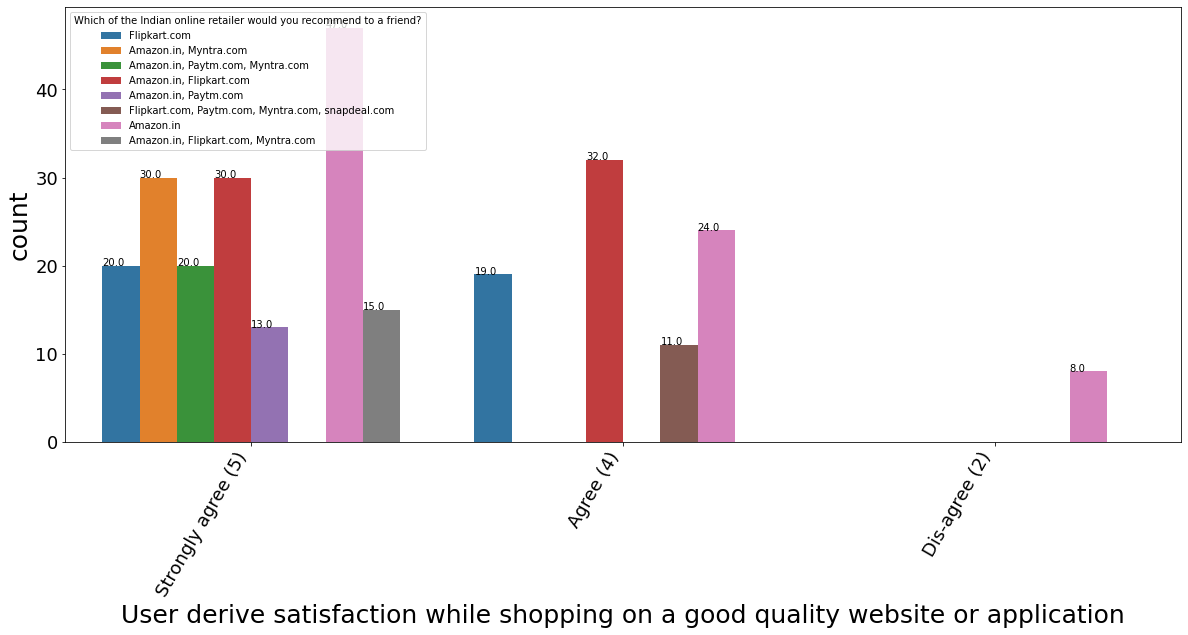

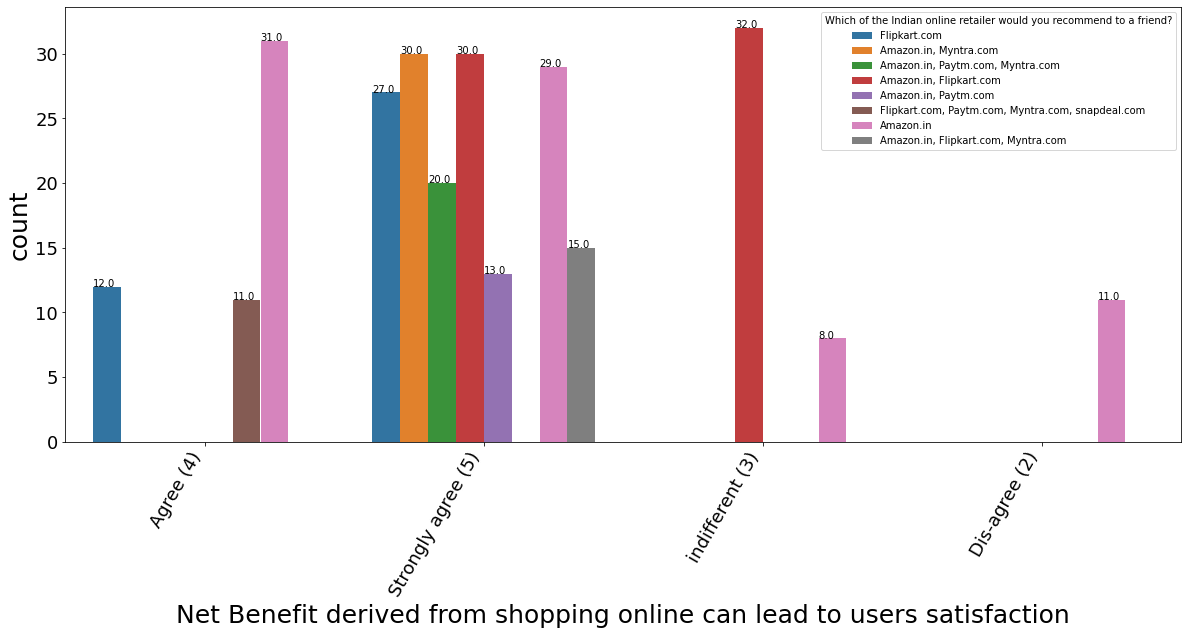

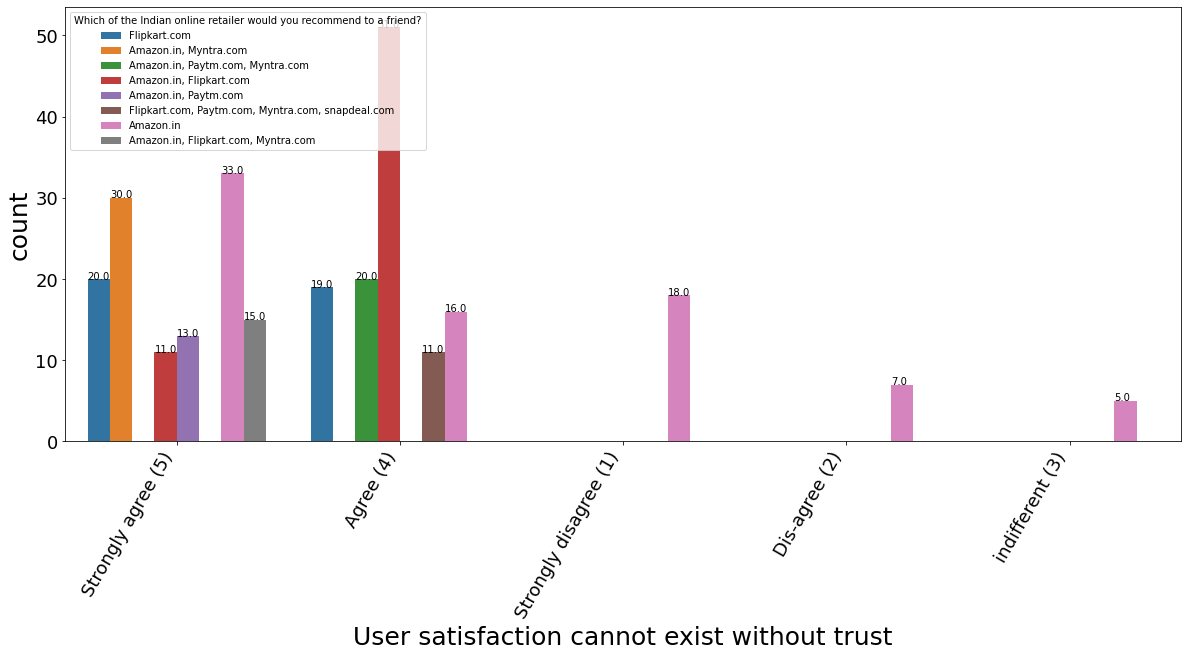

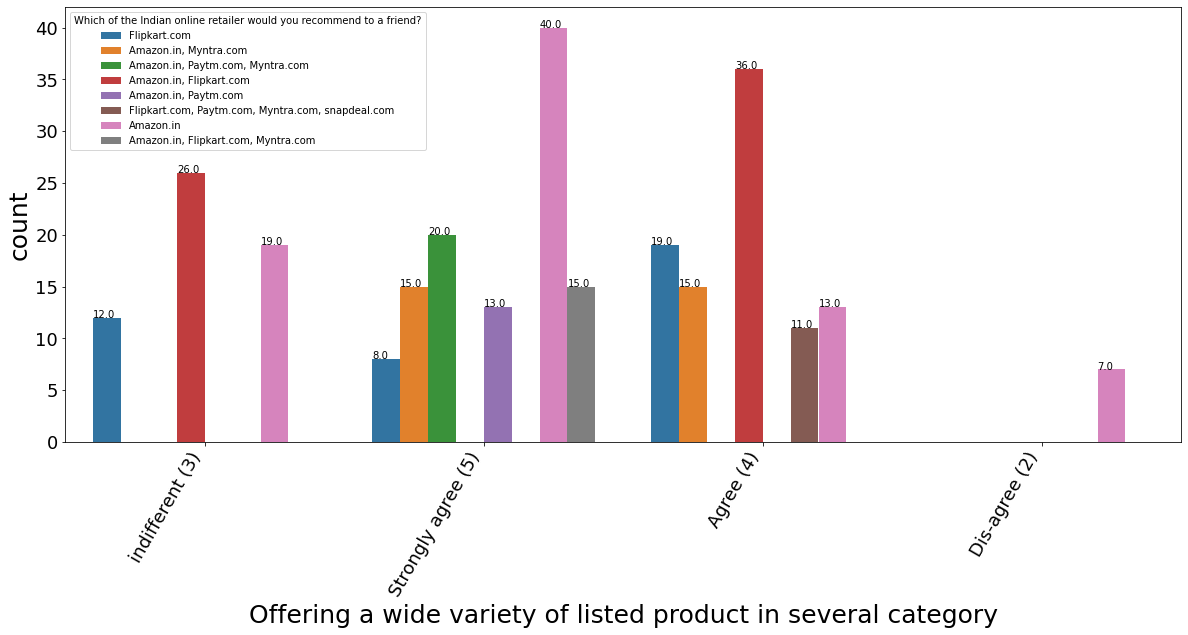

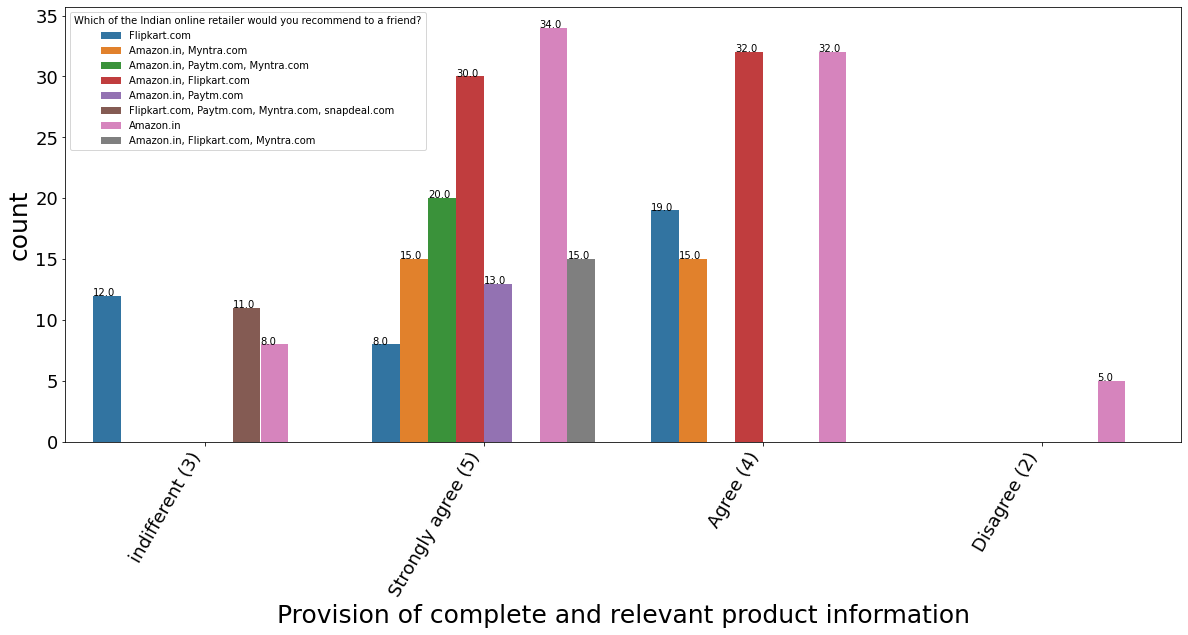

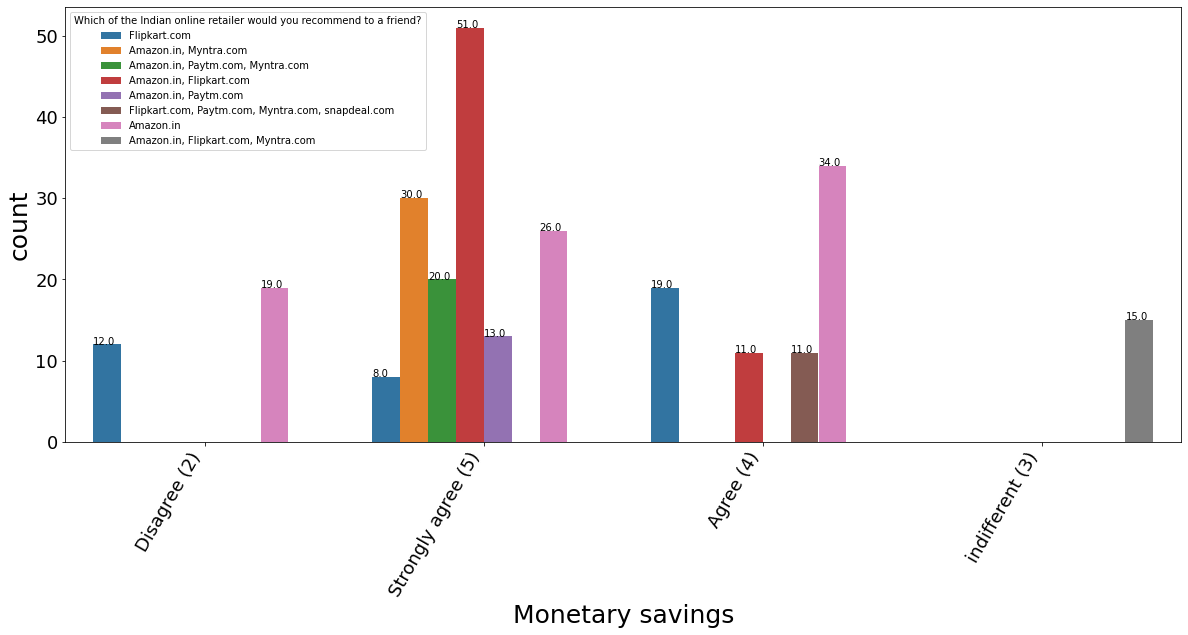

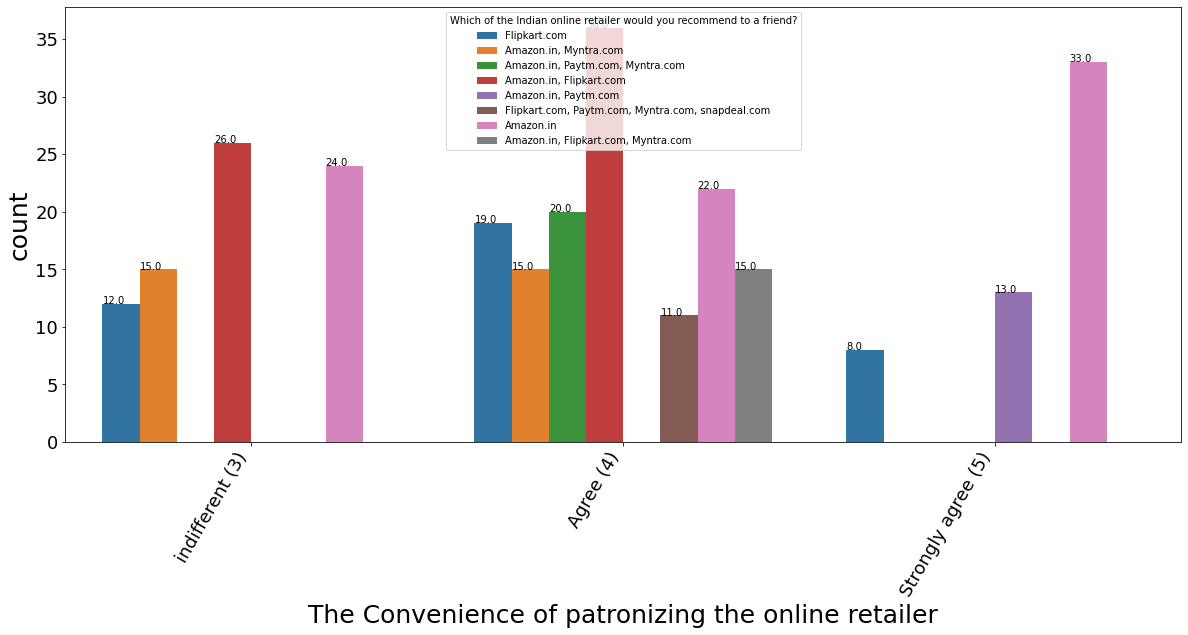

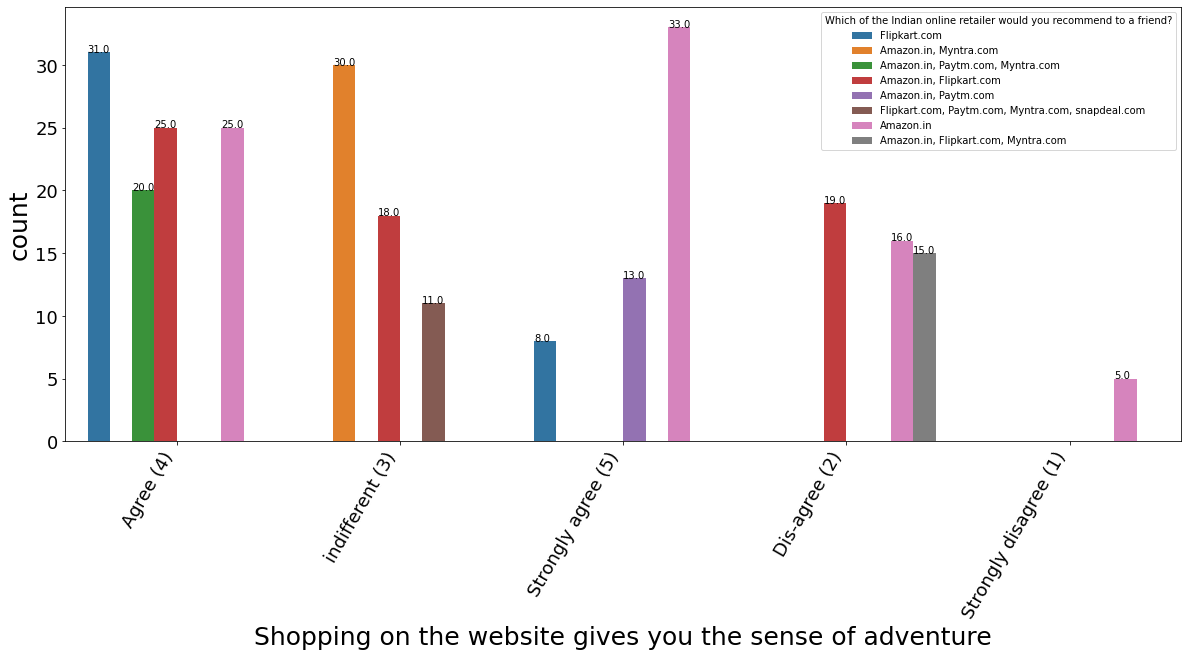

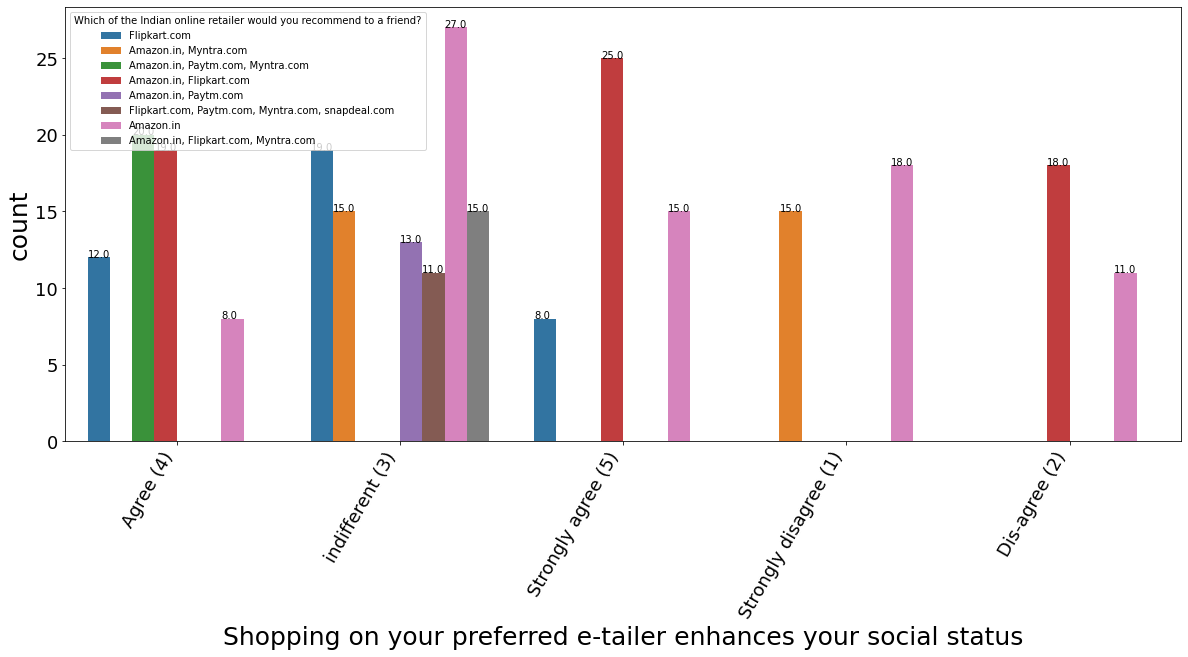

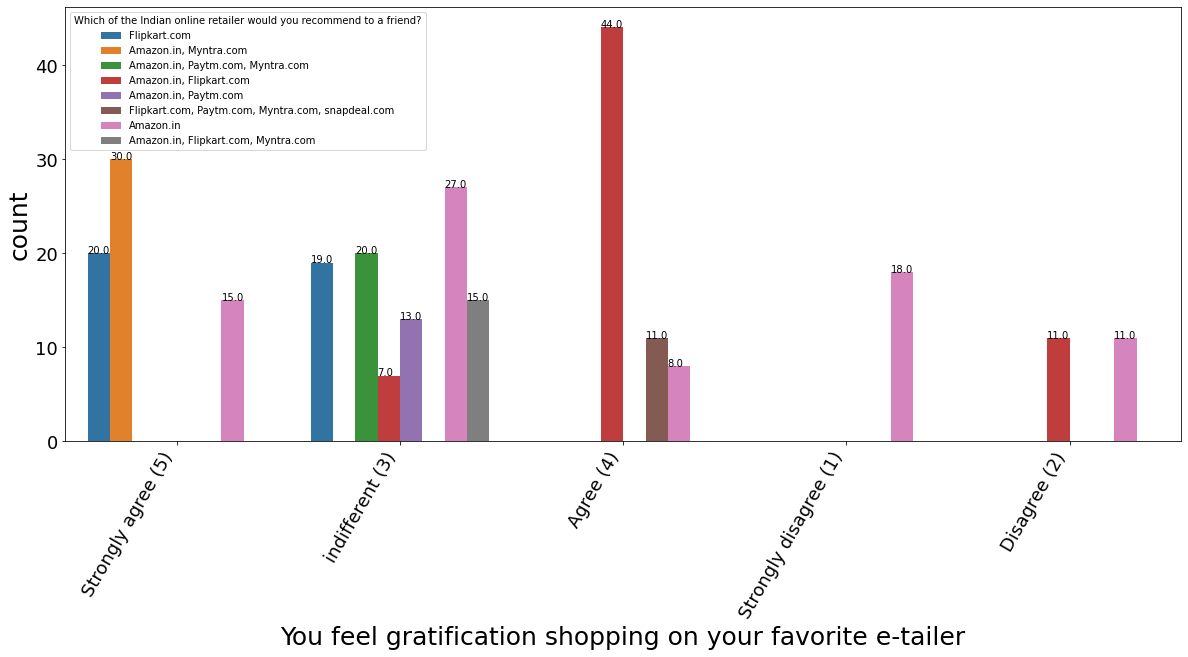

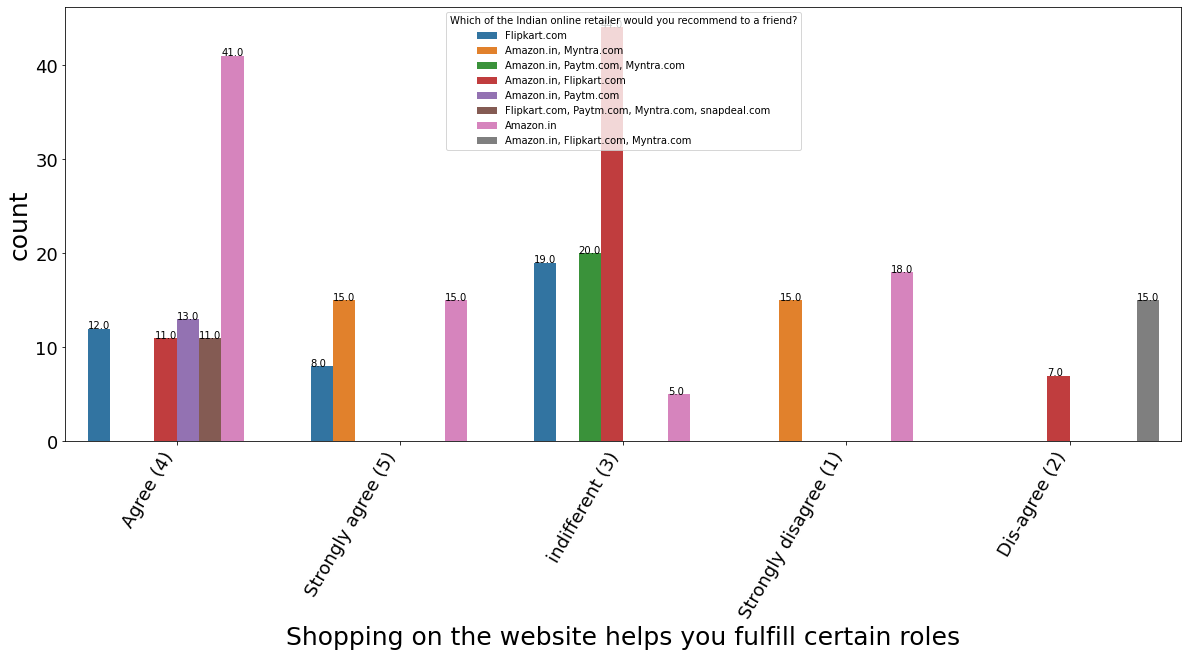

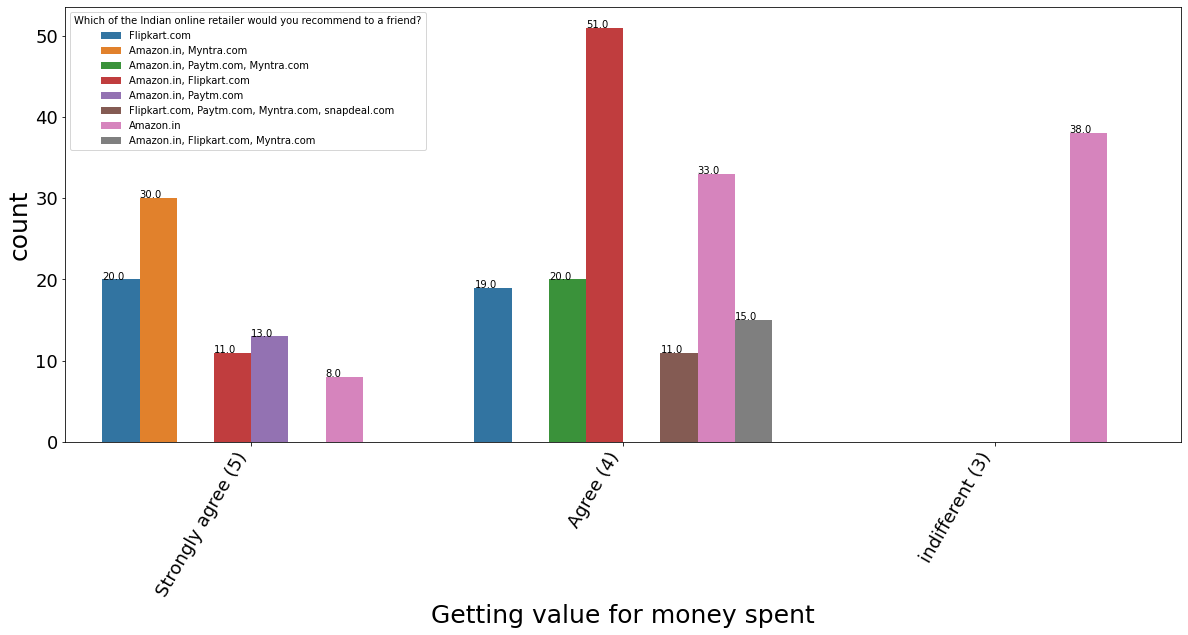

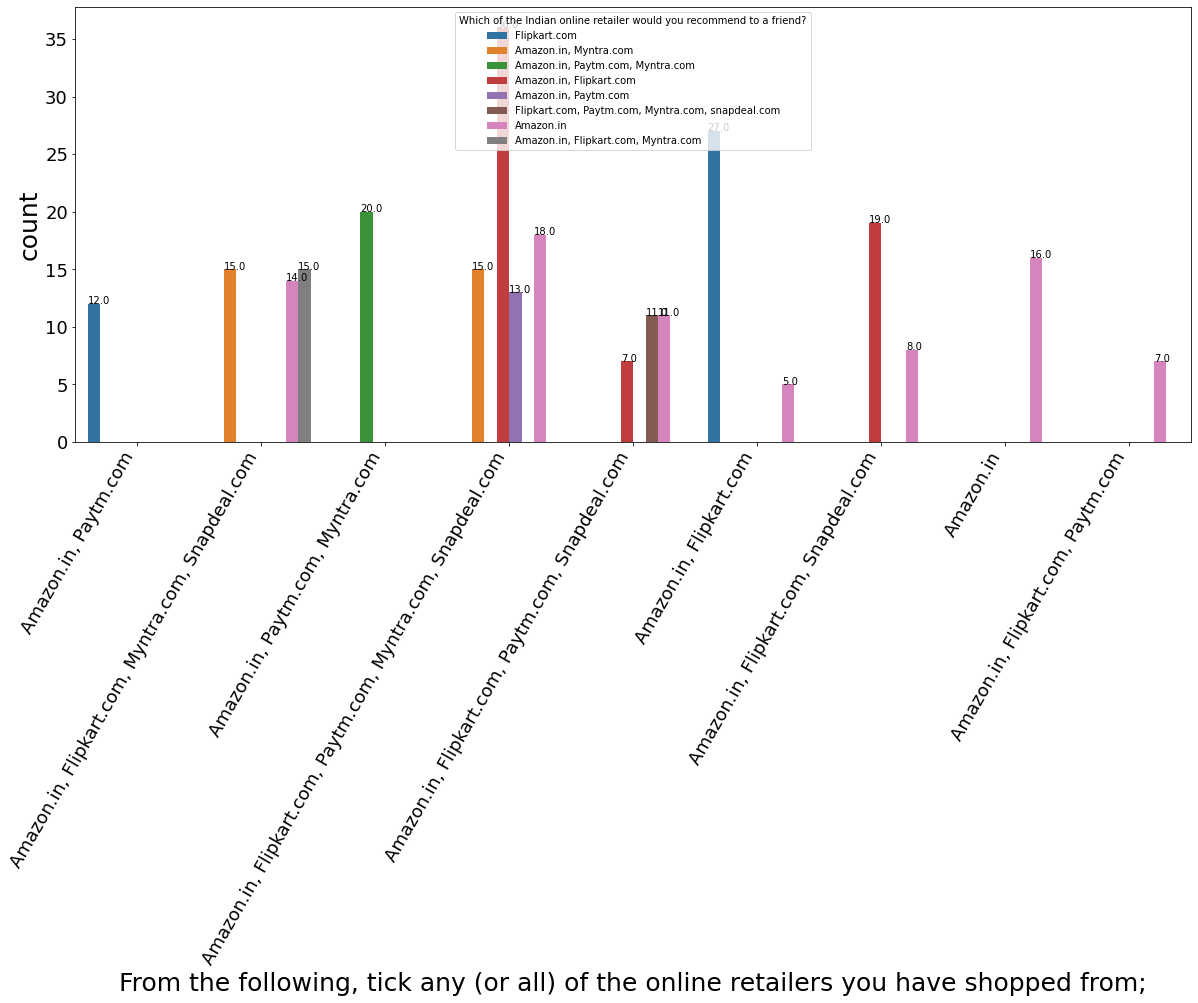

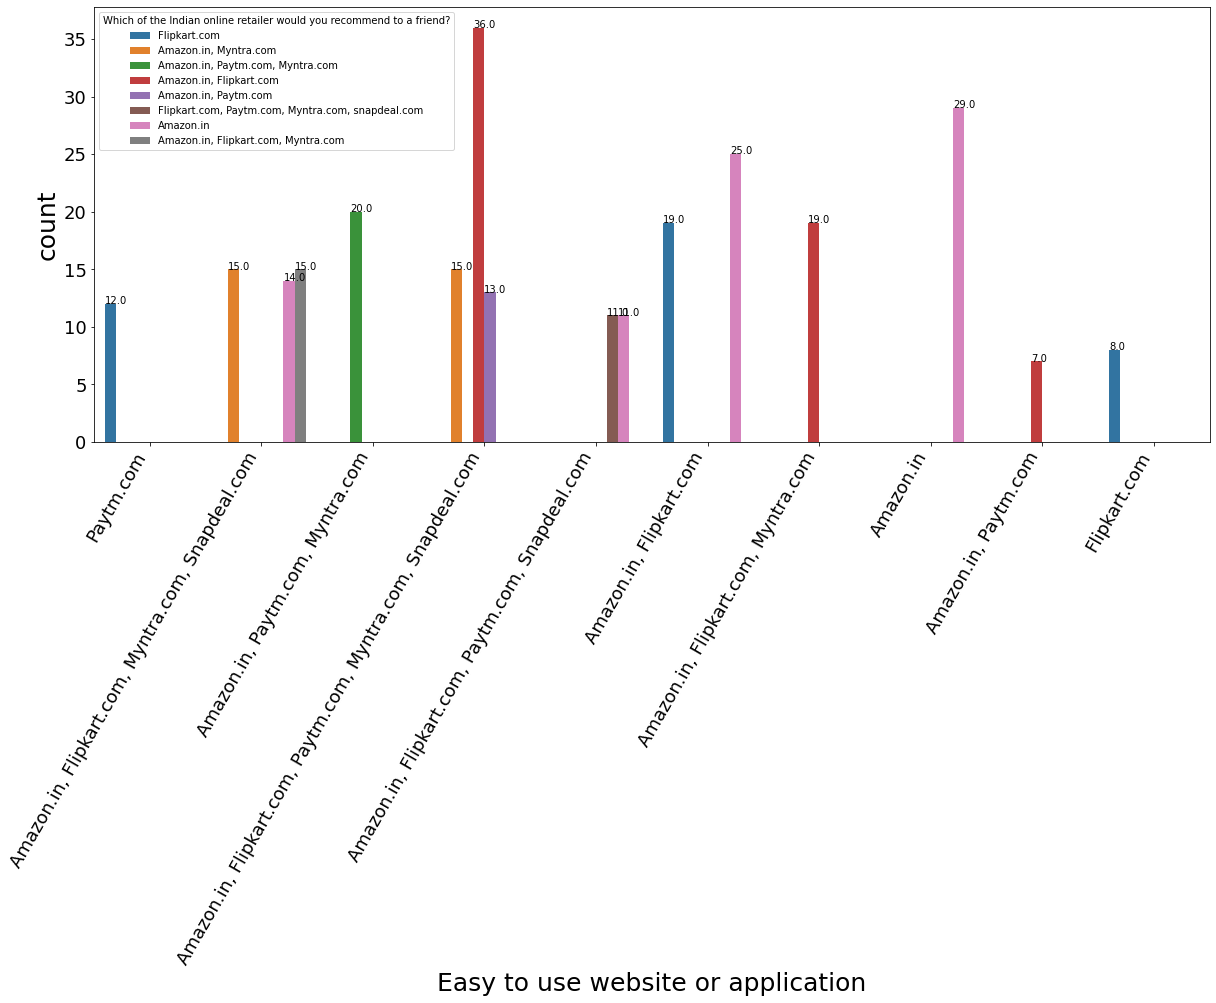

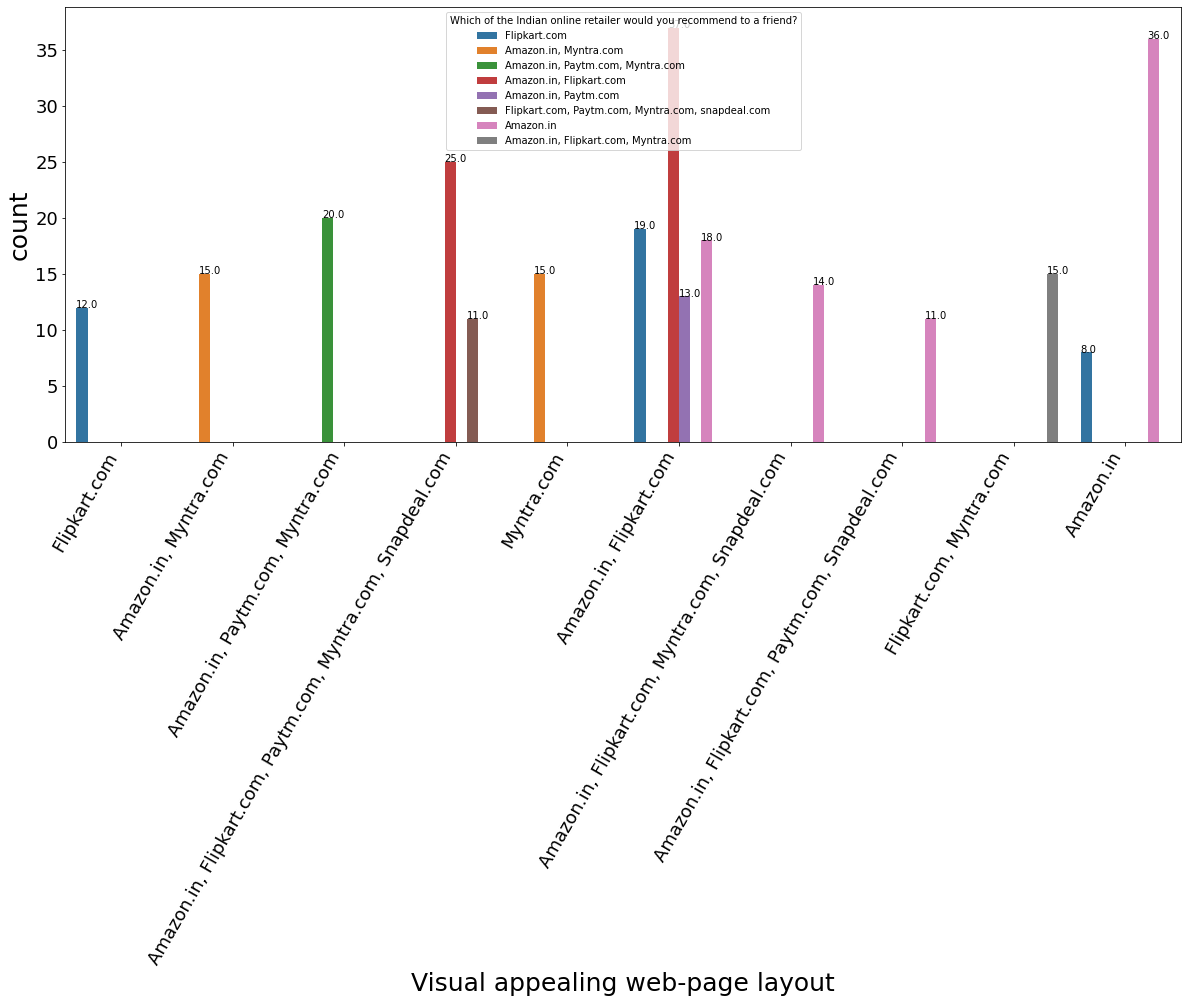

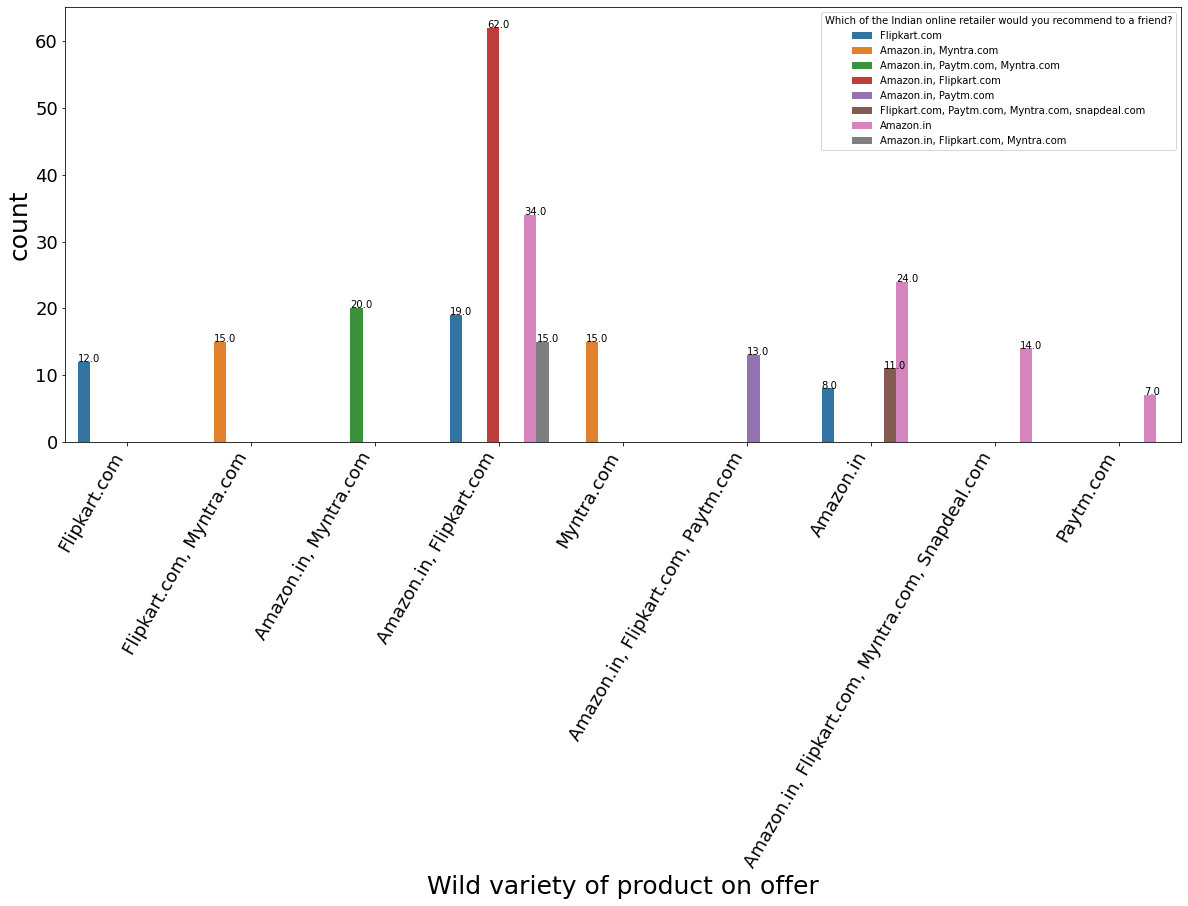

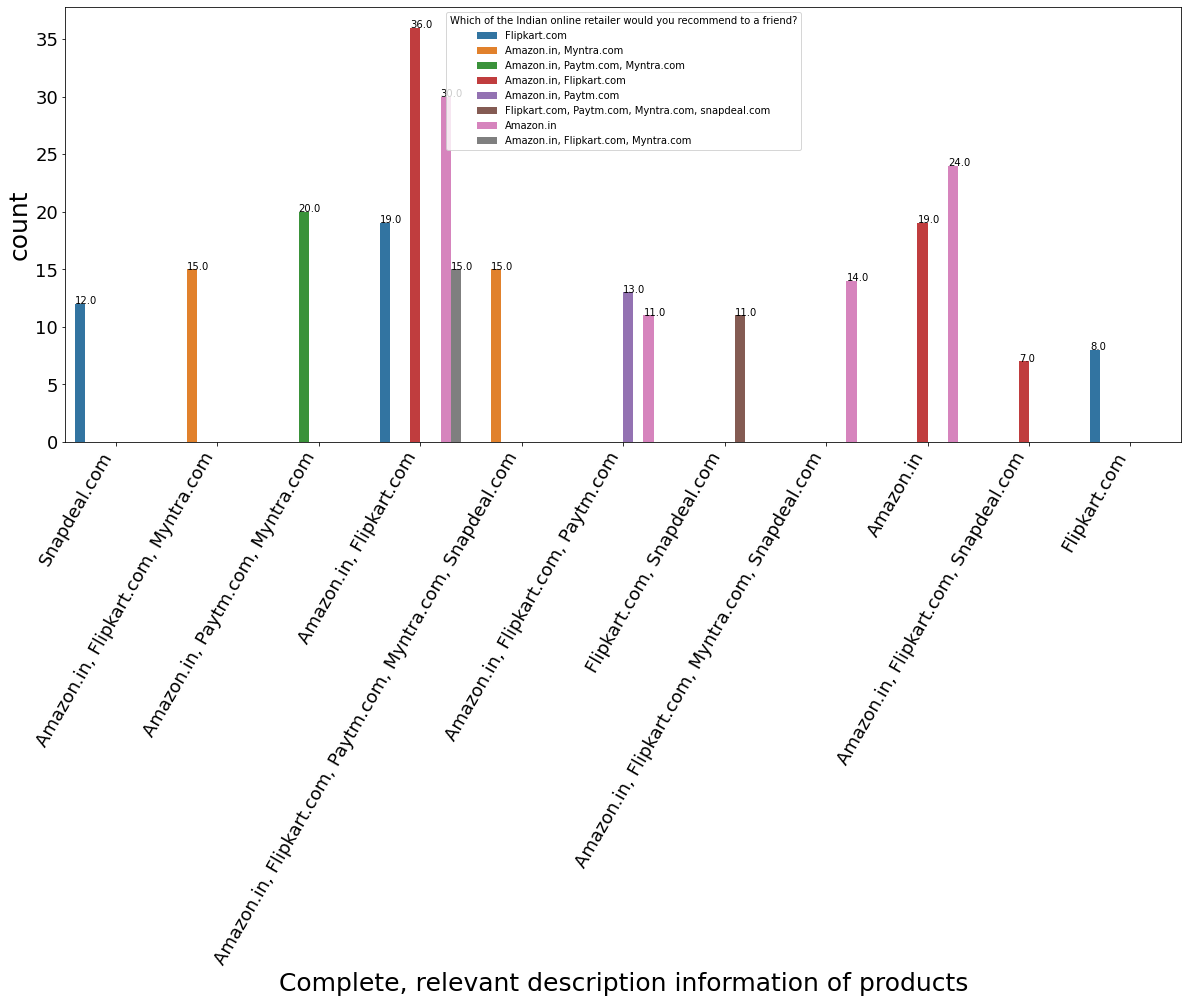

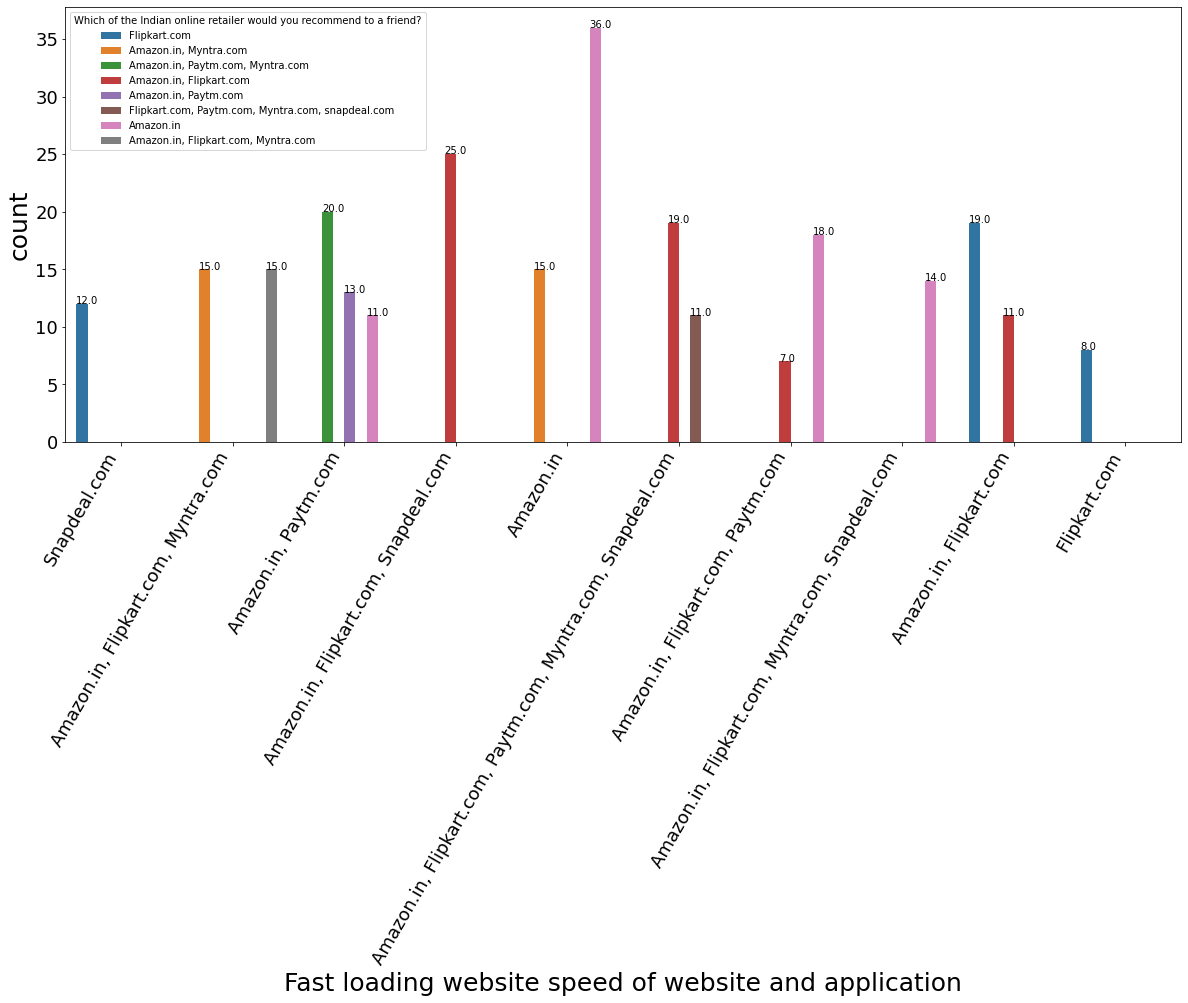

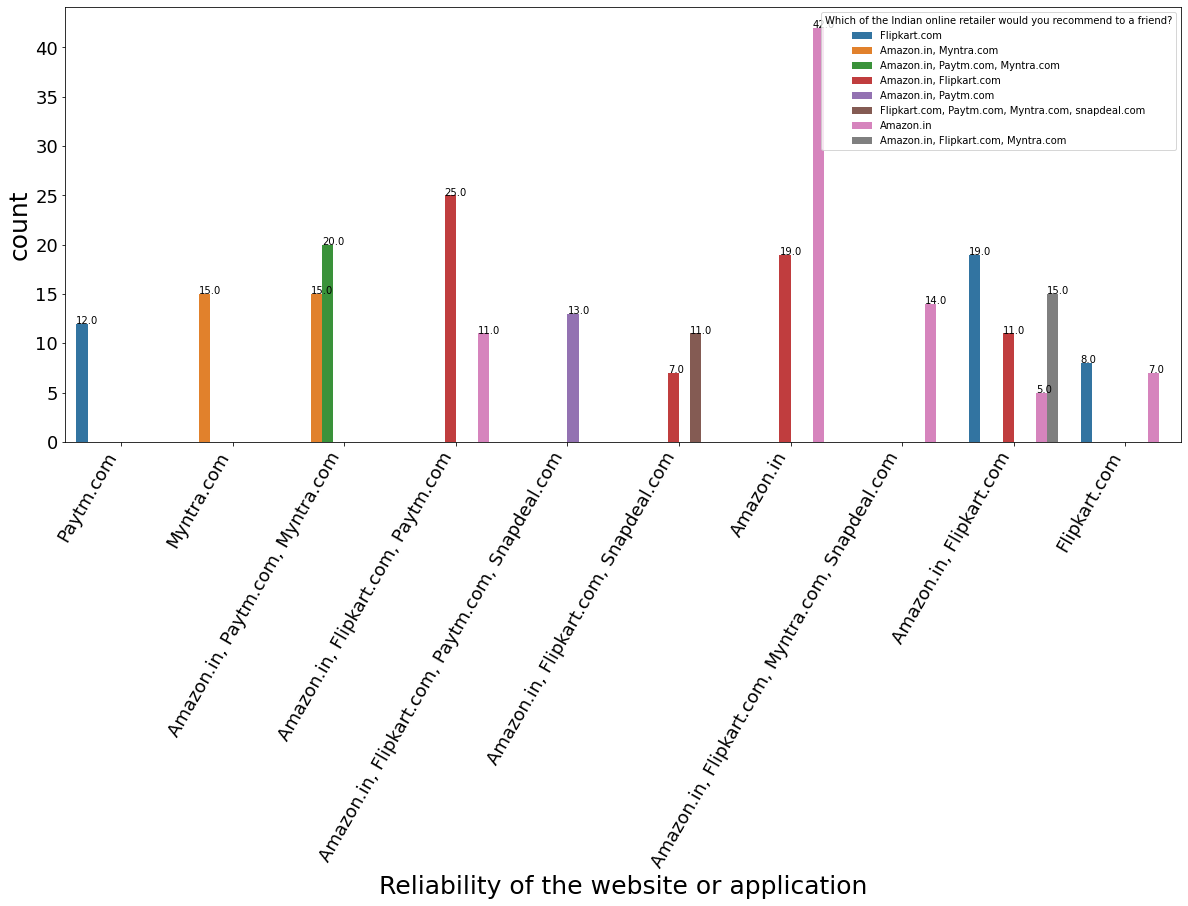

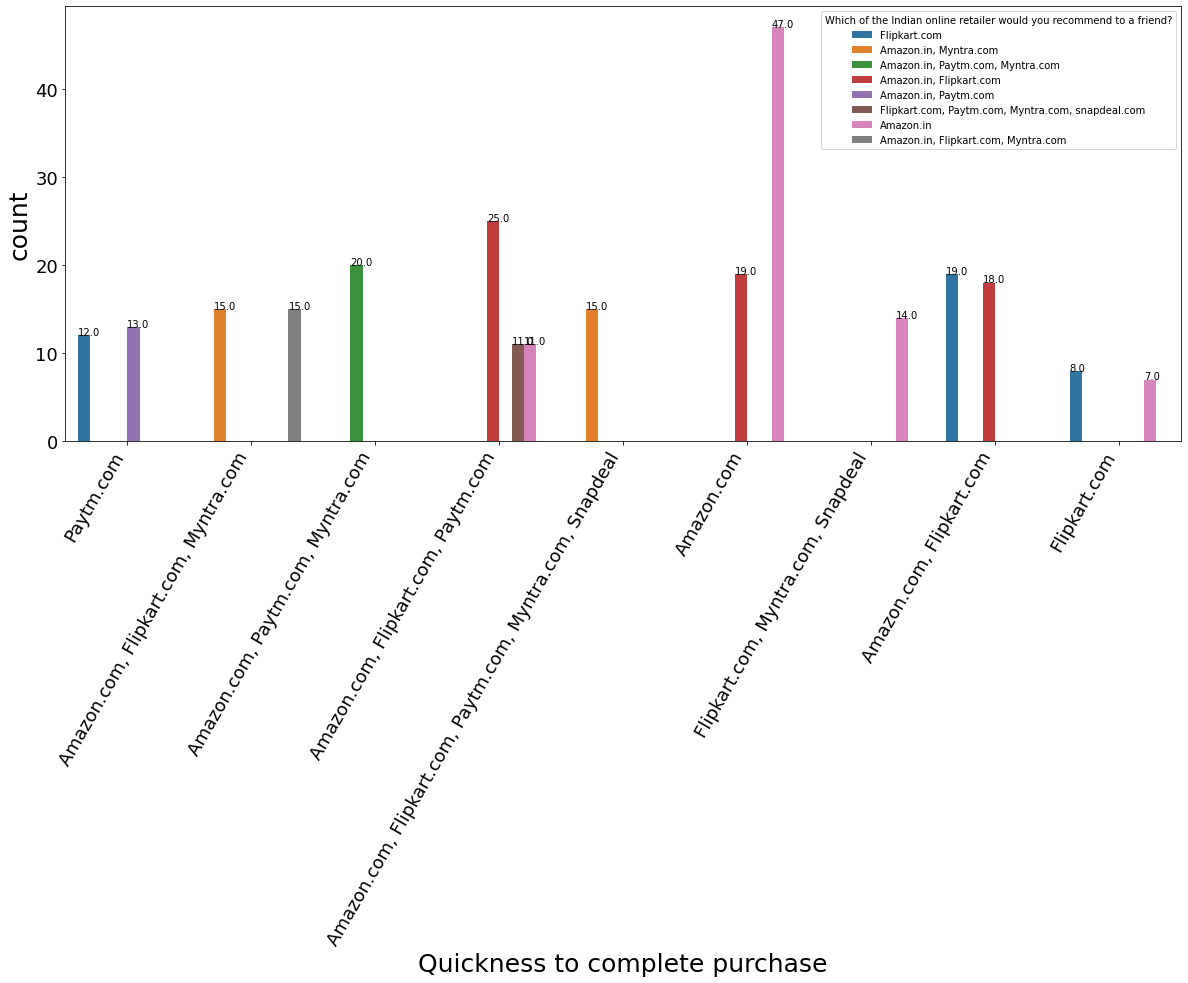

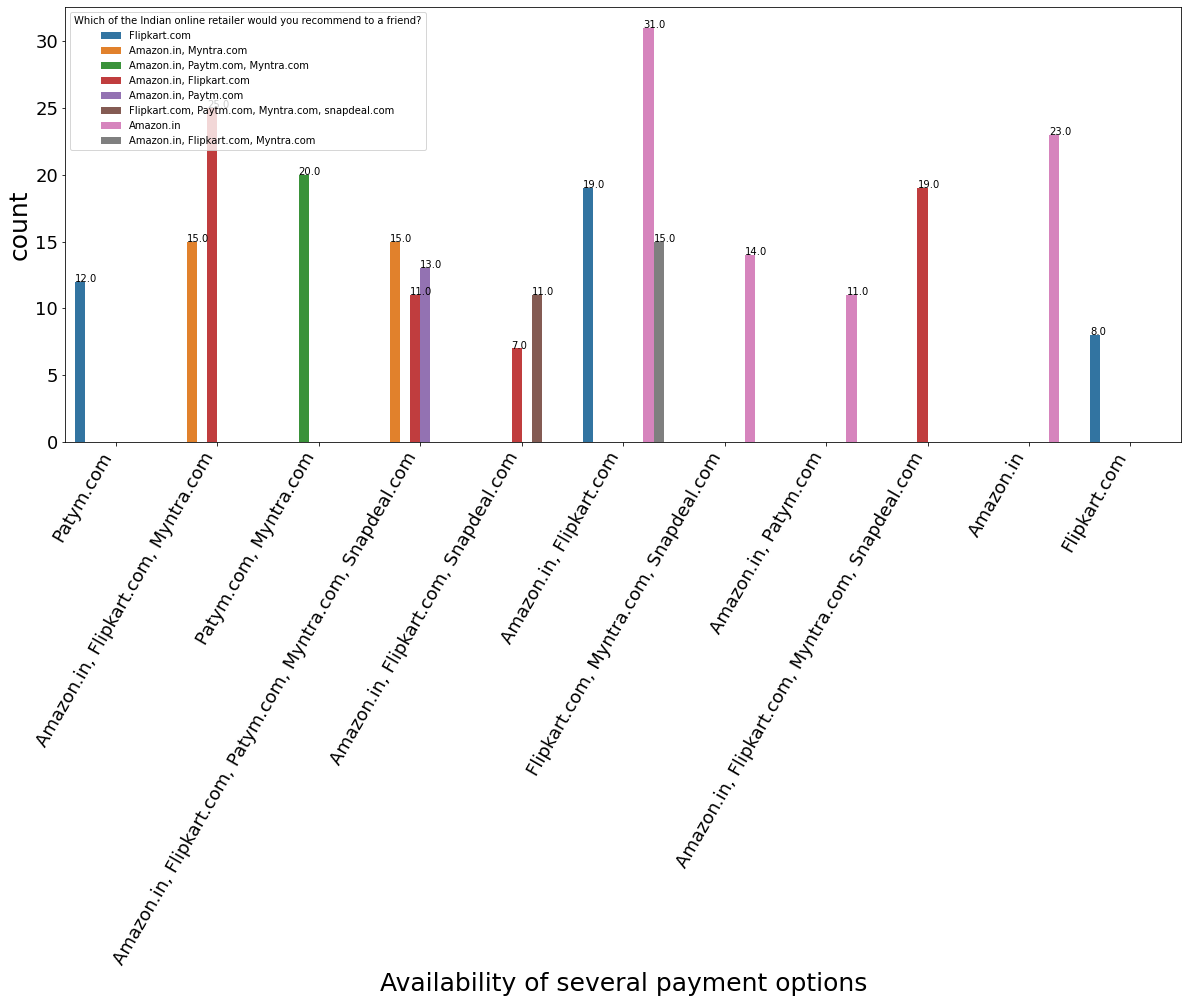

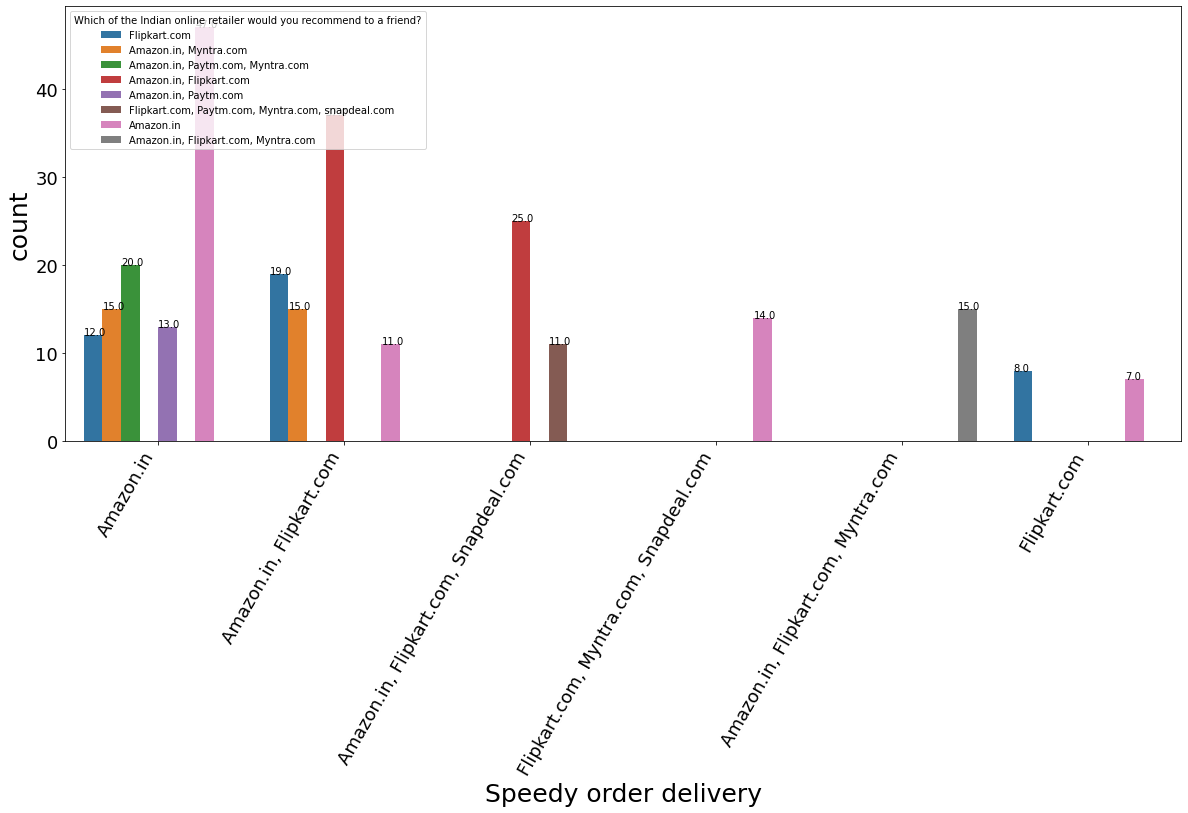

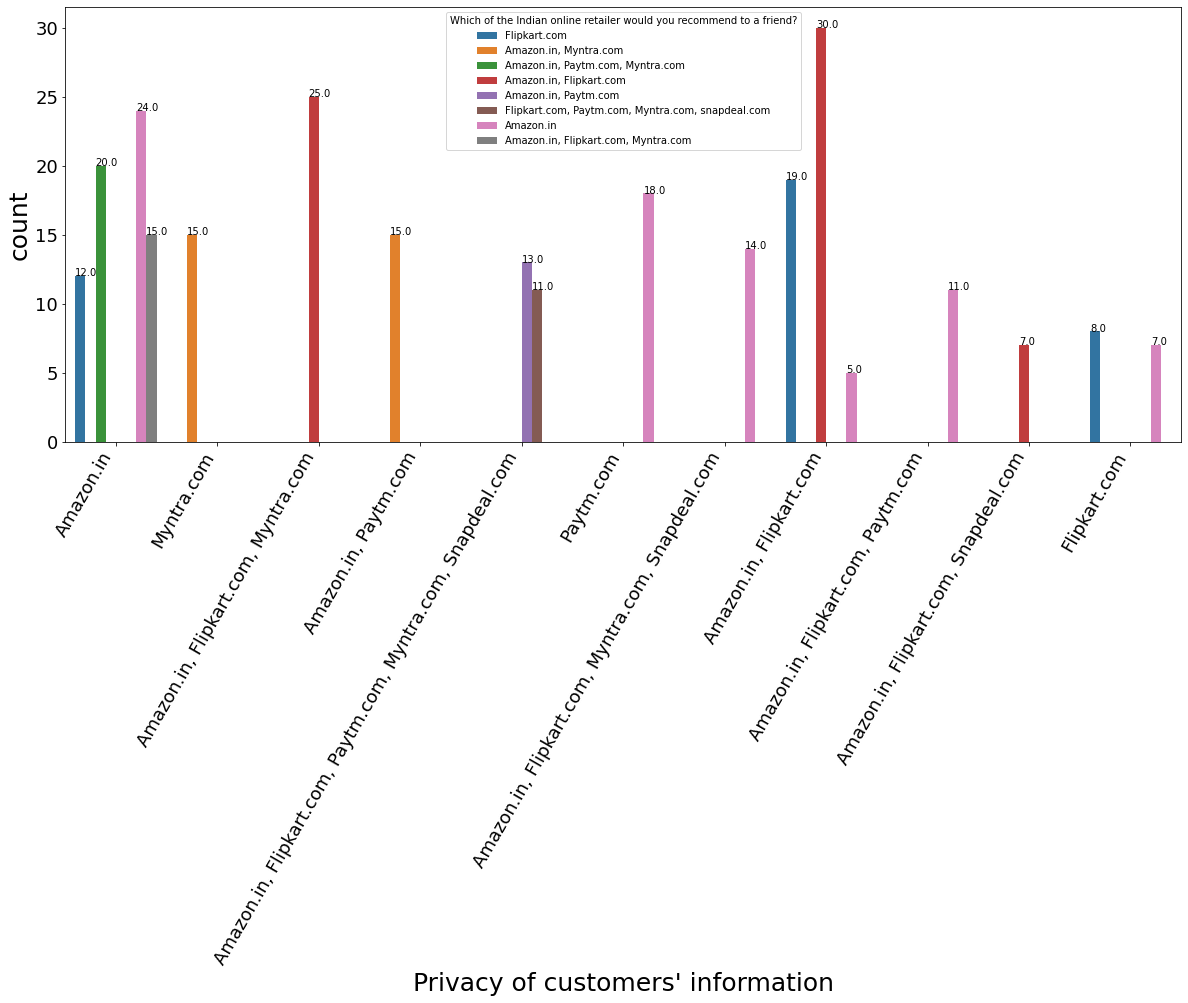

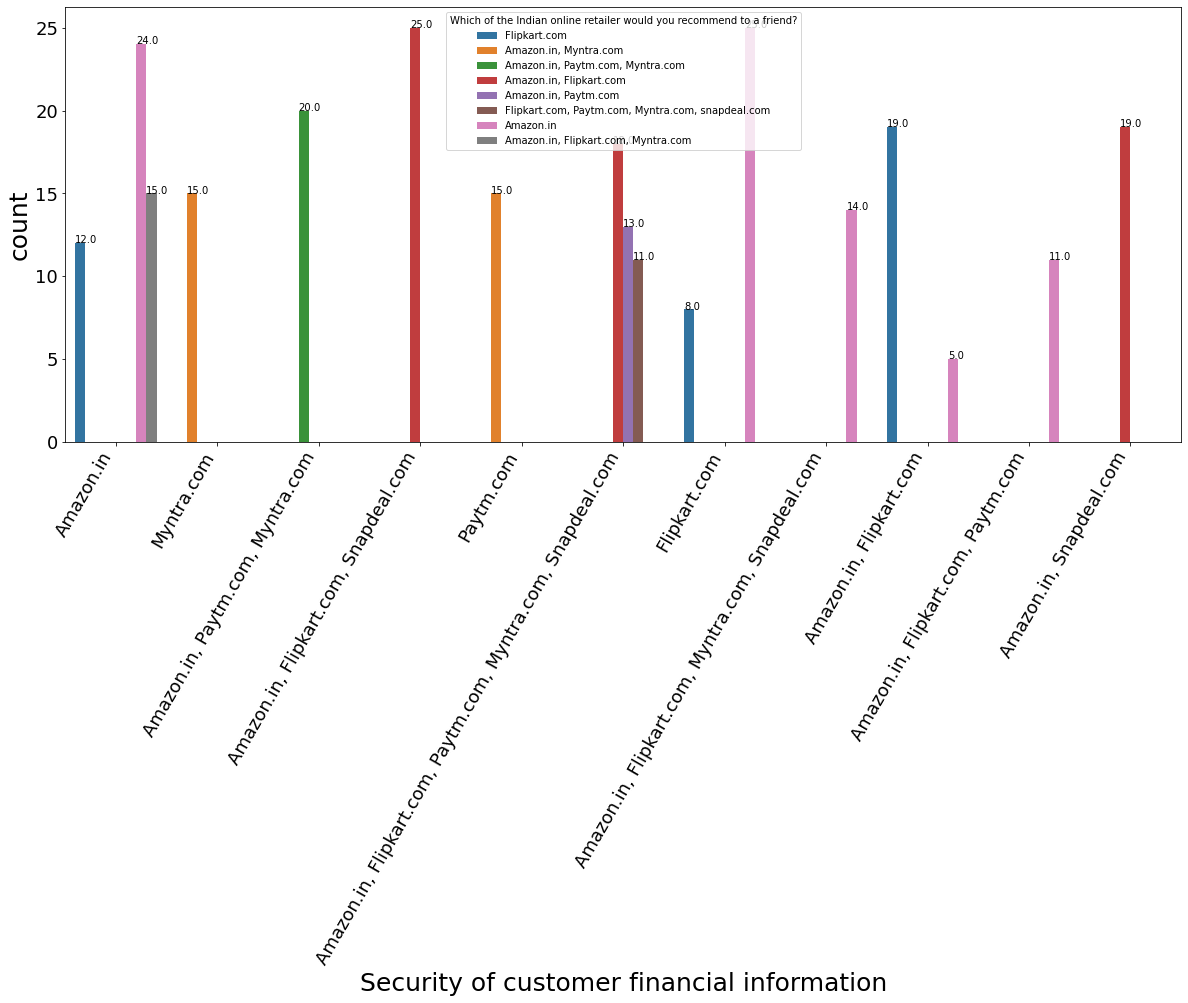

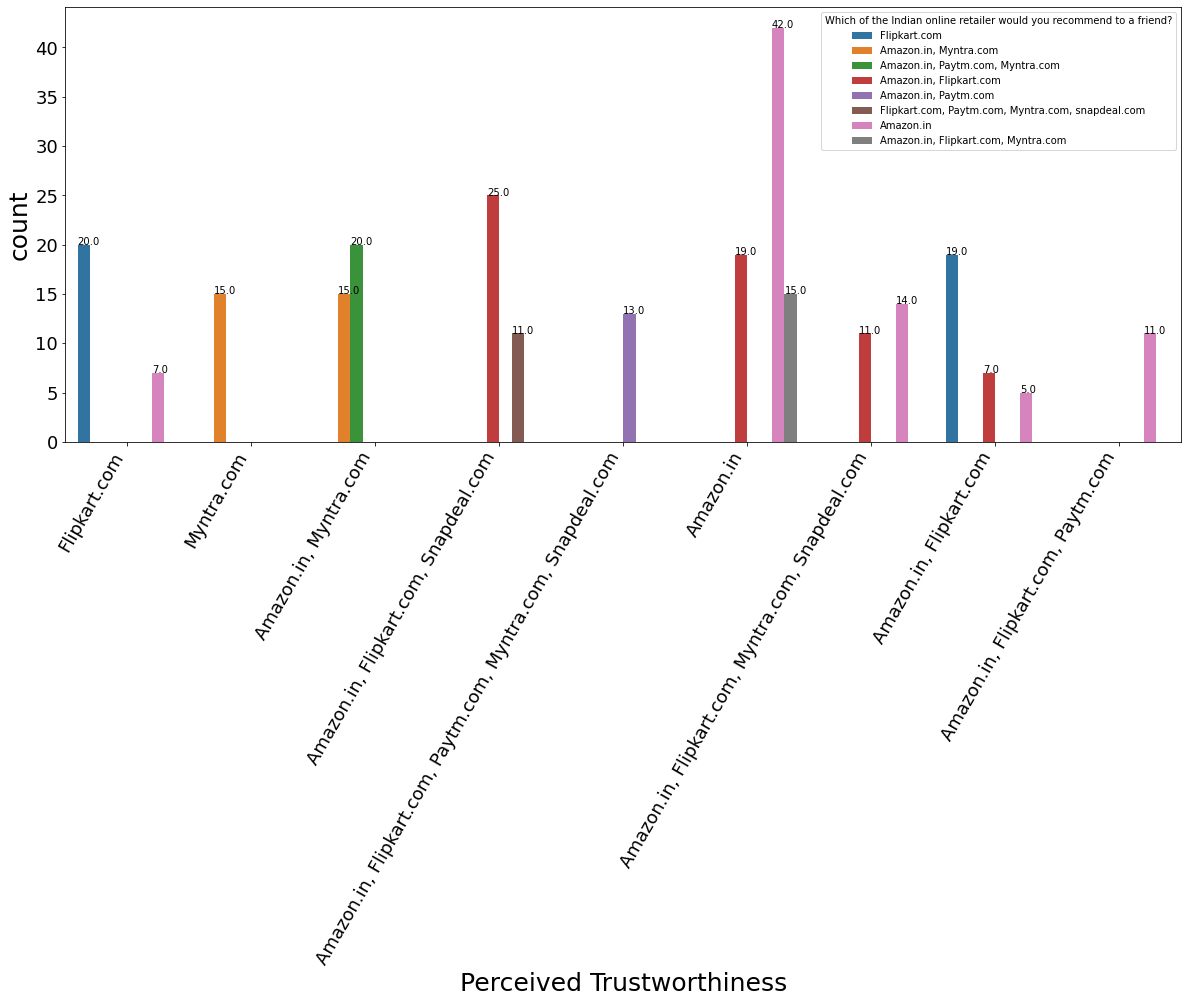

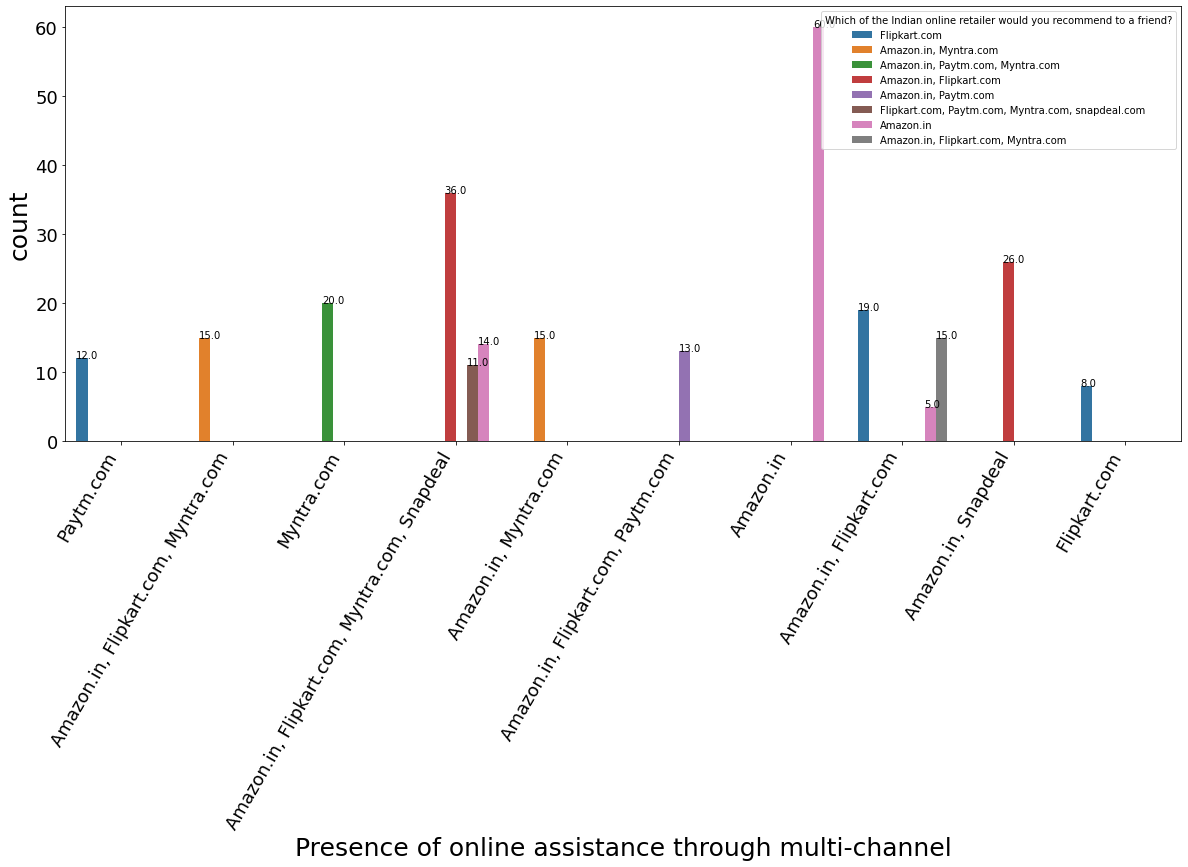

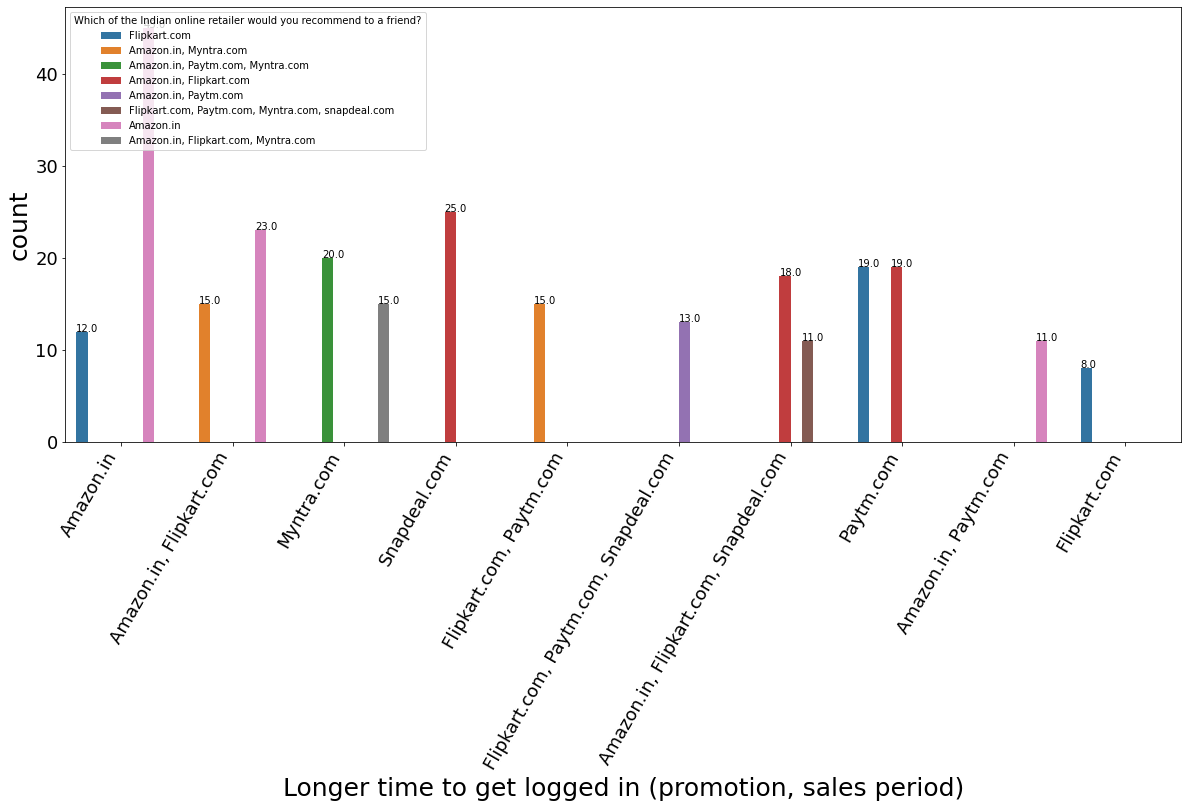

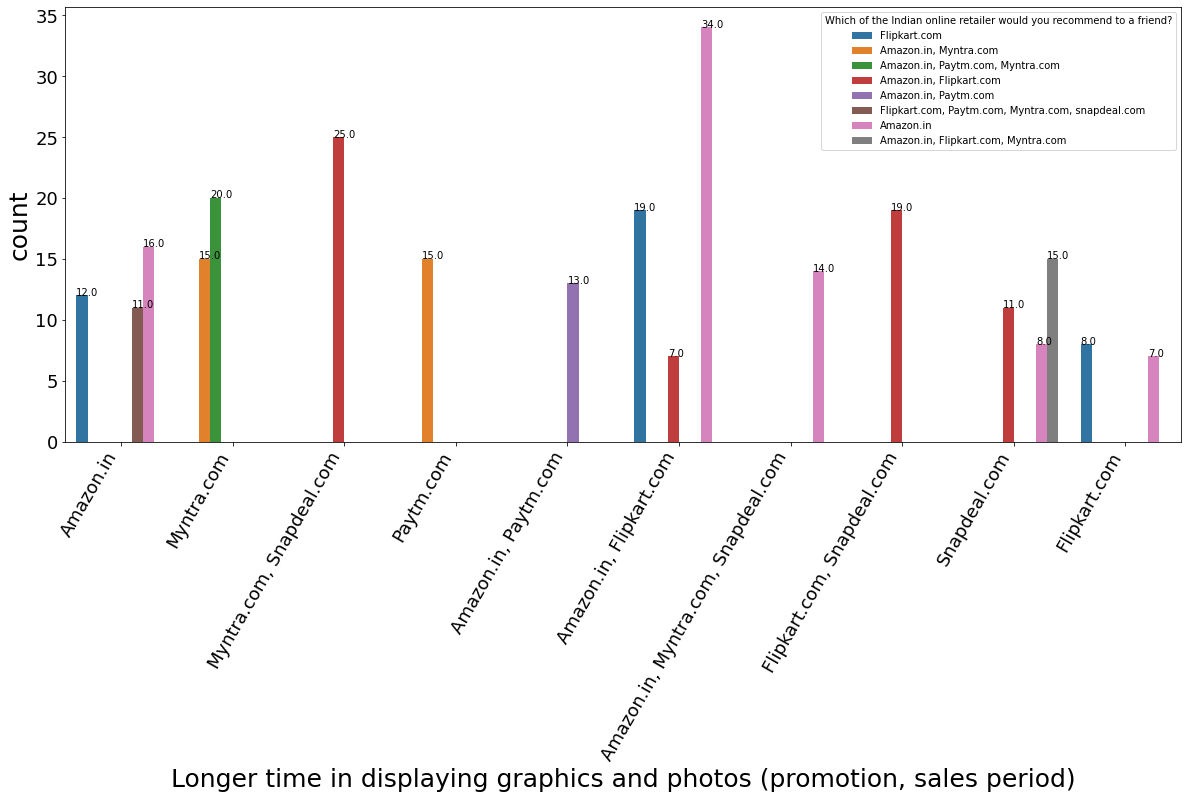

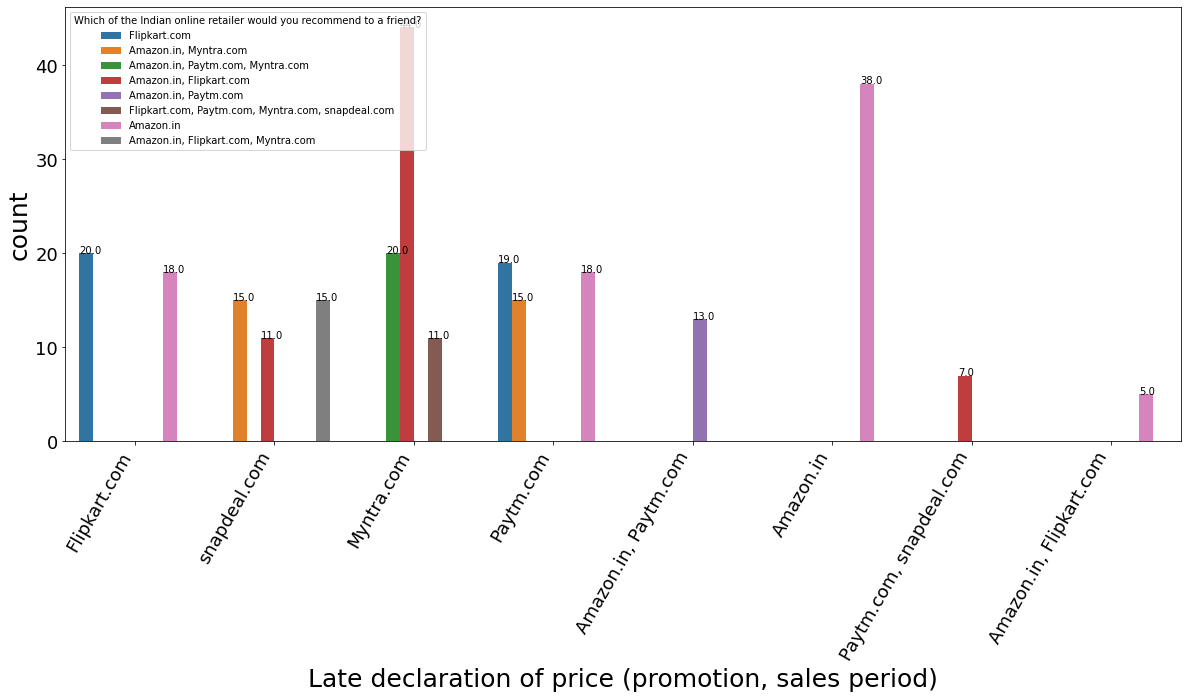

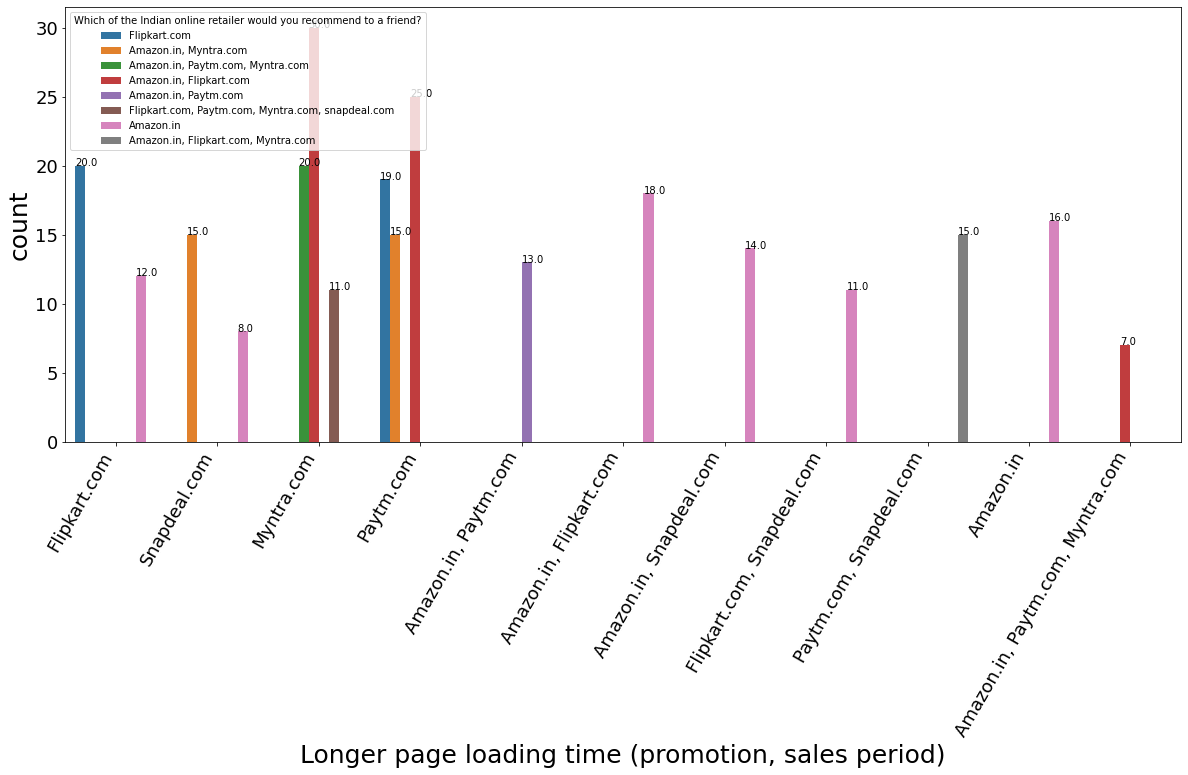

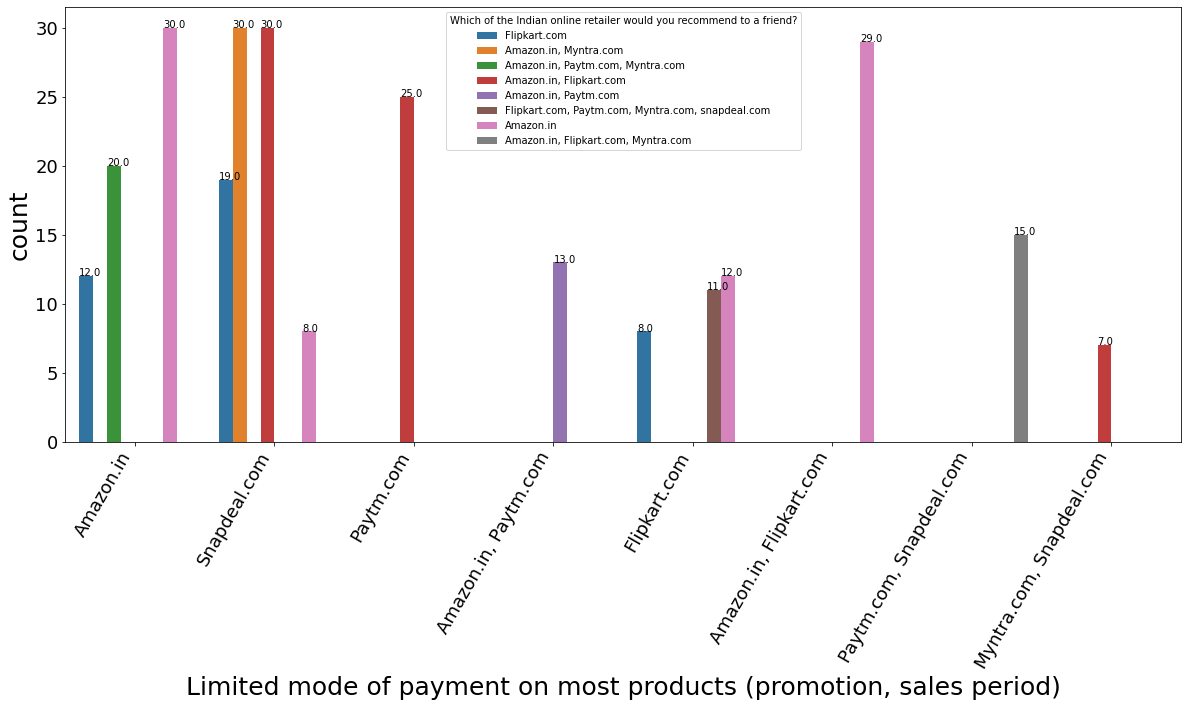

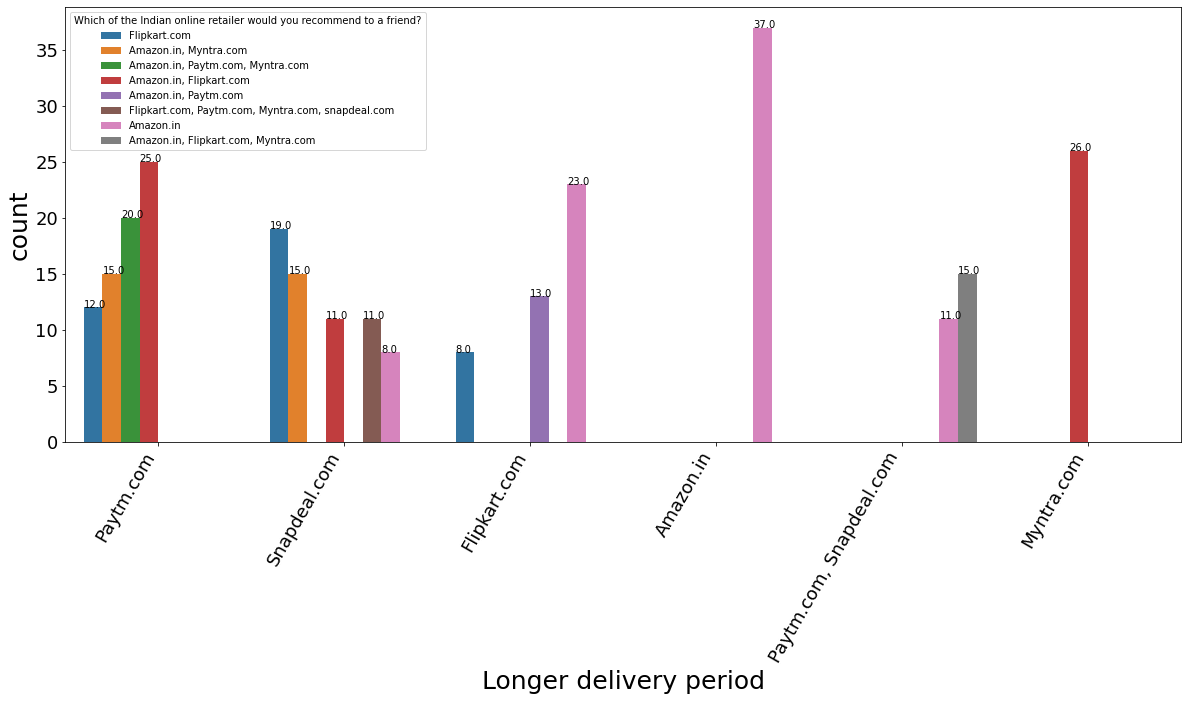

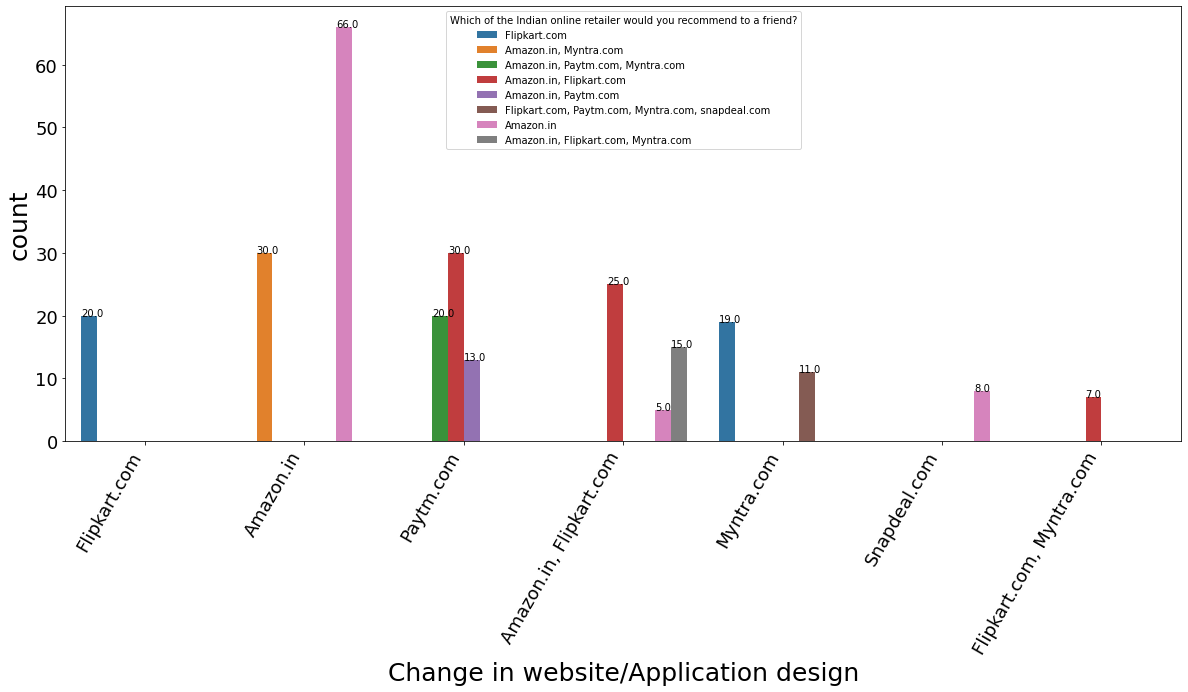

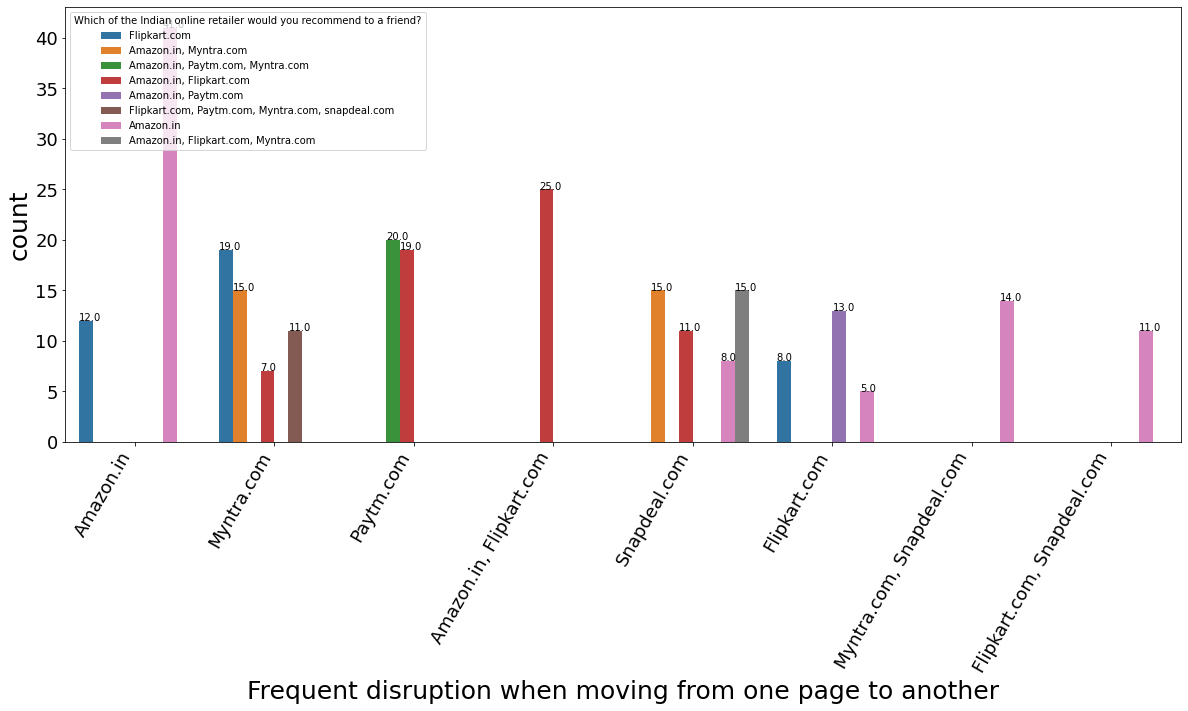

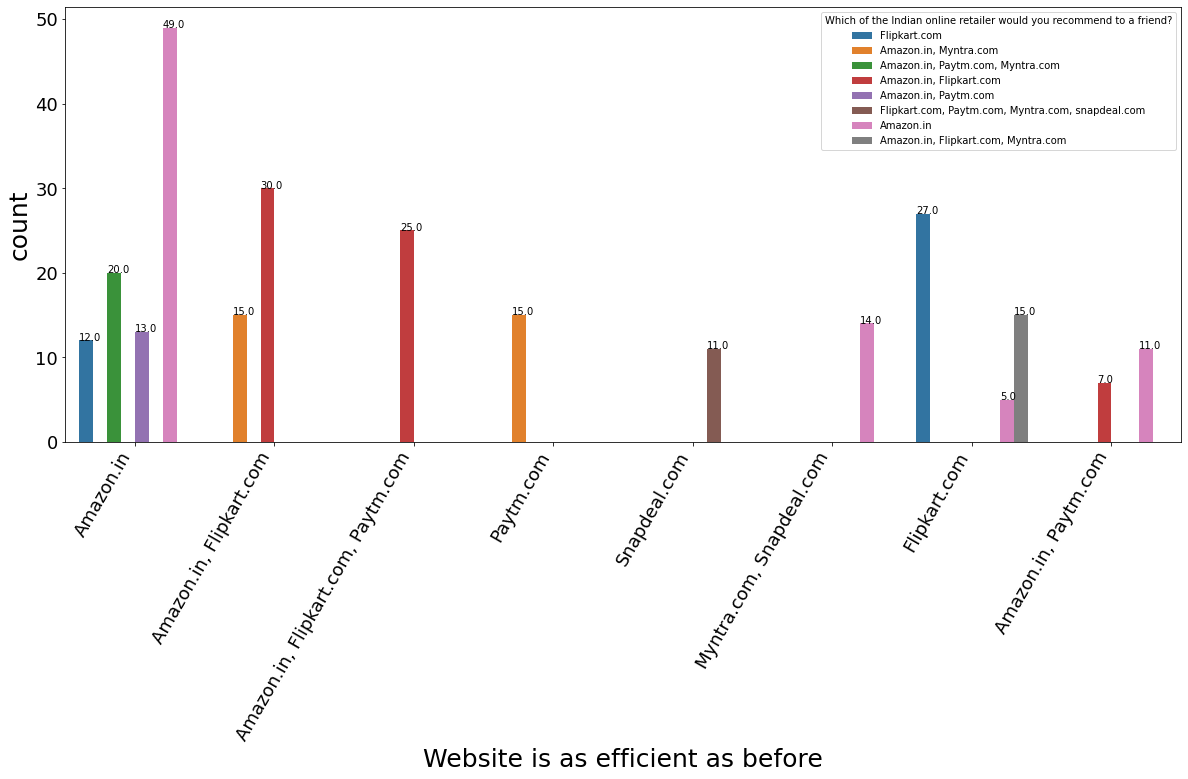

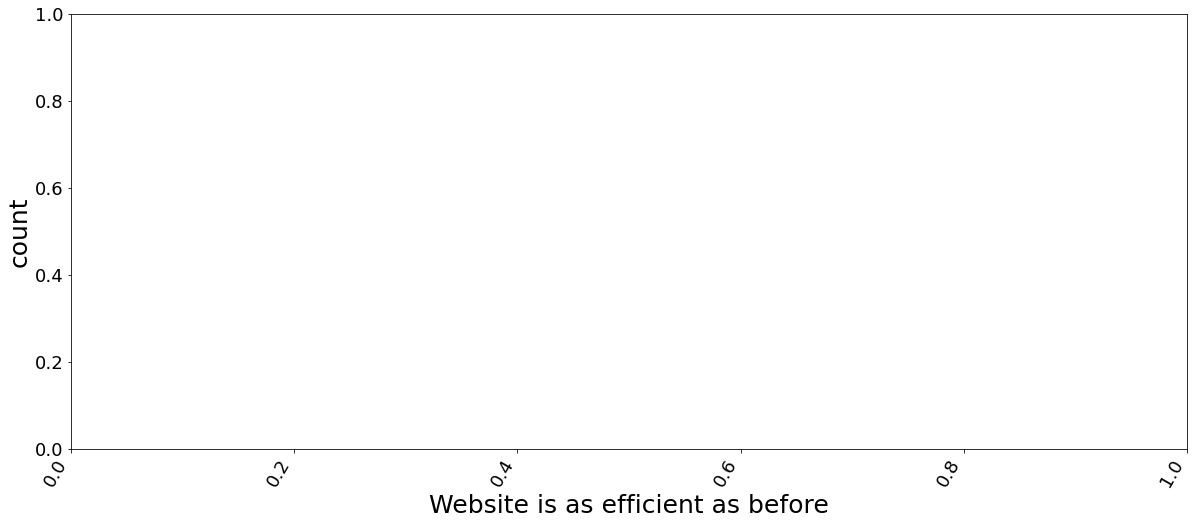

In [506]:
# Visualizing all our columns with our Target

vis_col=[]

for i in customer.columns[0:70]:
    if i == len(customer.columns)-70:
        break
    col = sns.countplot(data = customer,x=i,hue='Which of the Indian online retailer would you recommend to a friend?')
    plt.figure(figsize=(20,8))
    plt.xlabel(i,fontsize=25)
    plt.xticks(size=18,rotation=60, ha='right')
    plt.ylabel('count',fontsize=25)
    plt.yticks(size=18)
    for p in col.patches:
        col.annotate(f'\n{p.get_height()}', (p.get_x()+0, p.get_height()), color='black', size=10,)
vis_col  

In [ ]:
observations:

1. Female customers are more 

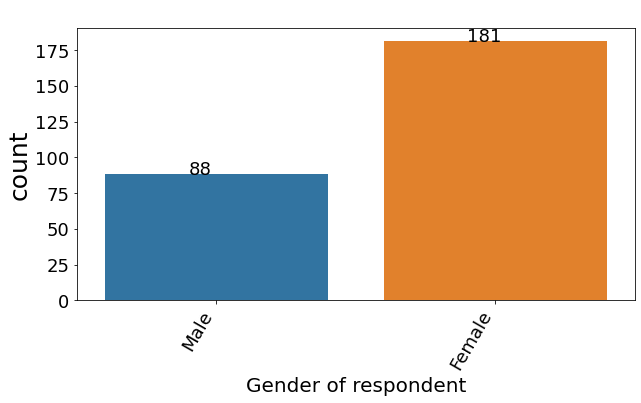

In [468]:
countp = sns.countplot(data = customer,x='Gender of respondent')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Gender of respondent',fontsize=20)
plt.xticks(size=18,rotation=60, ha='right')
plt.ylabel('count',fontsize=25)
plt.yticks(size=18)


for p in countp.patches:
    countp.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), color='black', size=18,)